# Amazon Headphone Products Review-Sentiment Analysis-EDA

### Import Necessary Libraries

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import contractions
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading the Cleaned Dataset

In [2]:
df = pd.read_json('/users/hp/desktop/Ds-springboard/capstone_2/data/clean_review_headphones.json')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1001391 to 999663
Data columns (total 19 columns):
product_id          61129 non-null object
rating              61129 non-null int64
reviewer_id         61129 non-null object
reviewer_name       61129 non-null object
unix_review_time    61129 non-null datetime64[ns]
url                 61129 non-null object
description         61129 non-null object
categories          61129 non-null object
product_title       61129 non-null object
price               61129 non-null float64
related             61129 non-null object
brand_name          61129 non-null object
review_text         61129 non-null object
pos_feedback        61129 non-null int64
neg_feedback        61129 non-null int64
rating_class        61129 non-null object
help_prop           61129 non-null float64
review_time         61129 non-null datetime64[ns]
clean_text          61129 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(12)
memory usag

### Inspecting the Dataset

In [4]:
df.head(5)

product_id  rating     reviewer_id                  reviewer_name  \
1001391  B004PYD88I       5  A2814AB4U75Q2L                      AlohaKona   
1001392  B004PYD88I       3  A1D0V9EVJQMXIK                Amazon Customer   
1001393  B004PYD88I       2  A2KA0B8FP32CHH  Chesteracorgi "Chesteracorgi"   
1001394  B004PYD88I       4  A195XHKRB3IGSY                eveningstargems   
1001395  B004PYD88I       4  A2F4XBBGUXM19V       Gary A. Drury "Techman1"   

        unix_review_time                                                url  \
1001391       2013-03-26  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001392       2013-02-25  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001393       2011-08-22  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001394       2012-08-14  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001395       2013-09-09  http://ecx.images-amazon.com/images/I/512ENRj4...   

                                               description  \
1001391  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001392  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001393  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001394  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001395  VIZIO's Bluetooth Stereo Headphones feature hi...   

                                                categories  \
1001391  [[Electronics, Accessories & Supplies, Audio &...   
1001392  [[Electronics, Accessories & Supplies, Audio &...   
1001393  [[Electronics, Accessories & Supplies, Audio &...   
1001394  [[Electronics, Accessories & Supplies, Audio &...   
1001395  [[Electronics, Accessories & Supplies, Audio &...   

                                             product_title  price  \
1001391  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   
1001392  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   
1001393  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   
1001394  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   
1001395  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   

                                                   related brand_name  \
1001391  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   
1001392  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   
1001393  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   
1001394  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   
1001395  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   

                                               review_text  pos_feedback  \
1001391  Vizio Bluetooth Stereo Headphones I am very pl...             0   
1001392  I have to agree The Good: These headphone pair...             1   
1001393  Uncomfortable and tinny sound I bought these o...             0   
1001394  Sound Quality Perfect, Battery Life is Great, ...             1   
1001395  VIZIO Bluetooth Stereo Headphones (XVTHB100) I...             0   

         neg_feedback rating_class  help_prop review_time  \
1001391             0         good        0.0  2013-03-26   
1001392             0         good        1.0  2013-02-25   
1001393             1          bad        0.0  2011-08-22   
1001394             0         good        1.0  2012-08-14   
1001395             0         good        0.0  2013-09-09   

                                                clean_text  
1001391  vizio bluetooth stereo headphones please headp...  
1001392  agree good headphone pair iphone easily sound ...  
1001393  uncomfortable tinny sound buy read review try ...  
1001394  sound quality perfect battery life great charg...  
1001395  vizio bluetooth stereo headphones xvthb purcha...

In [5]:
df.shape

(61129, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1001391 to 999663
Data columns (total 19 columns):
product_id          61129 non-null object
rating              61129 non-null int64
reviewer_id         61129 non-null object
reviewer_name       61129 non-null object
unix_review_time    61129 non-null datetime64[ns]
url                 61129 non-null object
description         61129 non-null object
categories          61129 non-null object
product_title       61129 non-null object
price               61129 non-null float64
related             61129 non-null object
brand_name          61129 non-null object
review_text         61129 non-null object
pos_feedback        61129 non-null int64
neg_feedback        61129 non-null int64
rating_class        61129 non-null object
help_prop           61129 non-null float64
review_time         61129 non-null datetime64[ns]
clean_text          61129 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(12)
memory usag

In [7]:
import pandas_profiling

In [8]:
pandas_profiling.ProfileReport(df)

## Exploratory Data Analysis

In [9]:
### 1.  "Product" Feature

Text(0, 0.5, 'Number of Reviews')

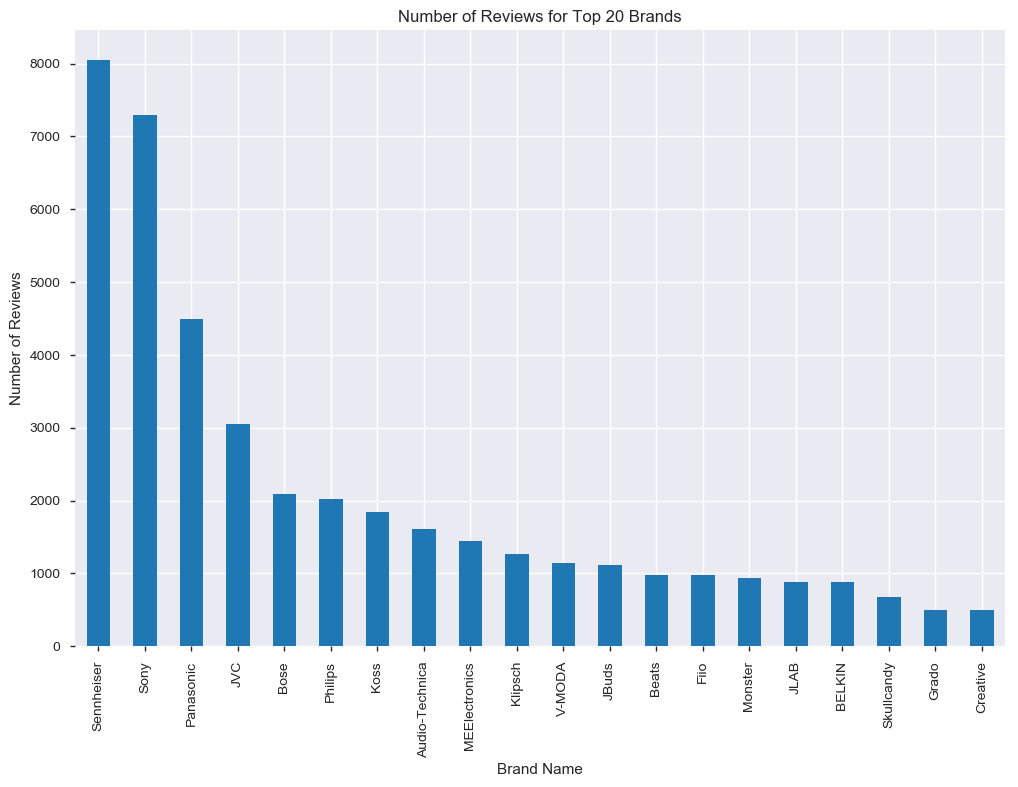

In [10]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = df["brand_name"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

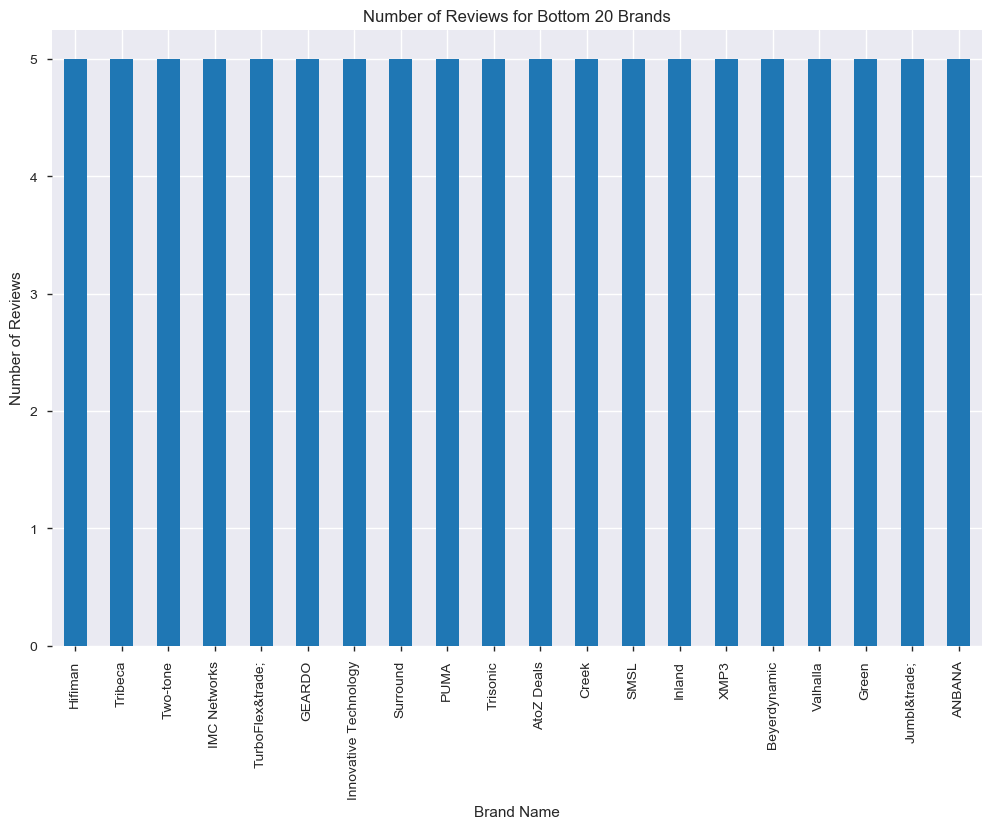

In [11]:
##########################################
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = df["brand_name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

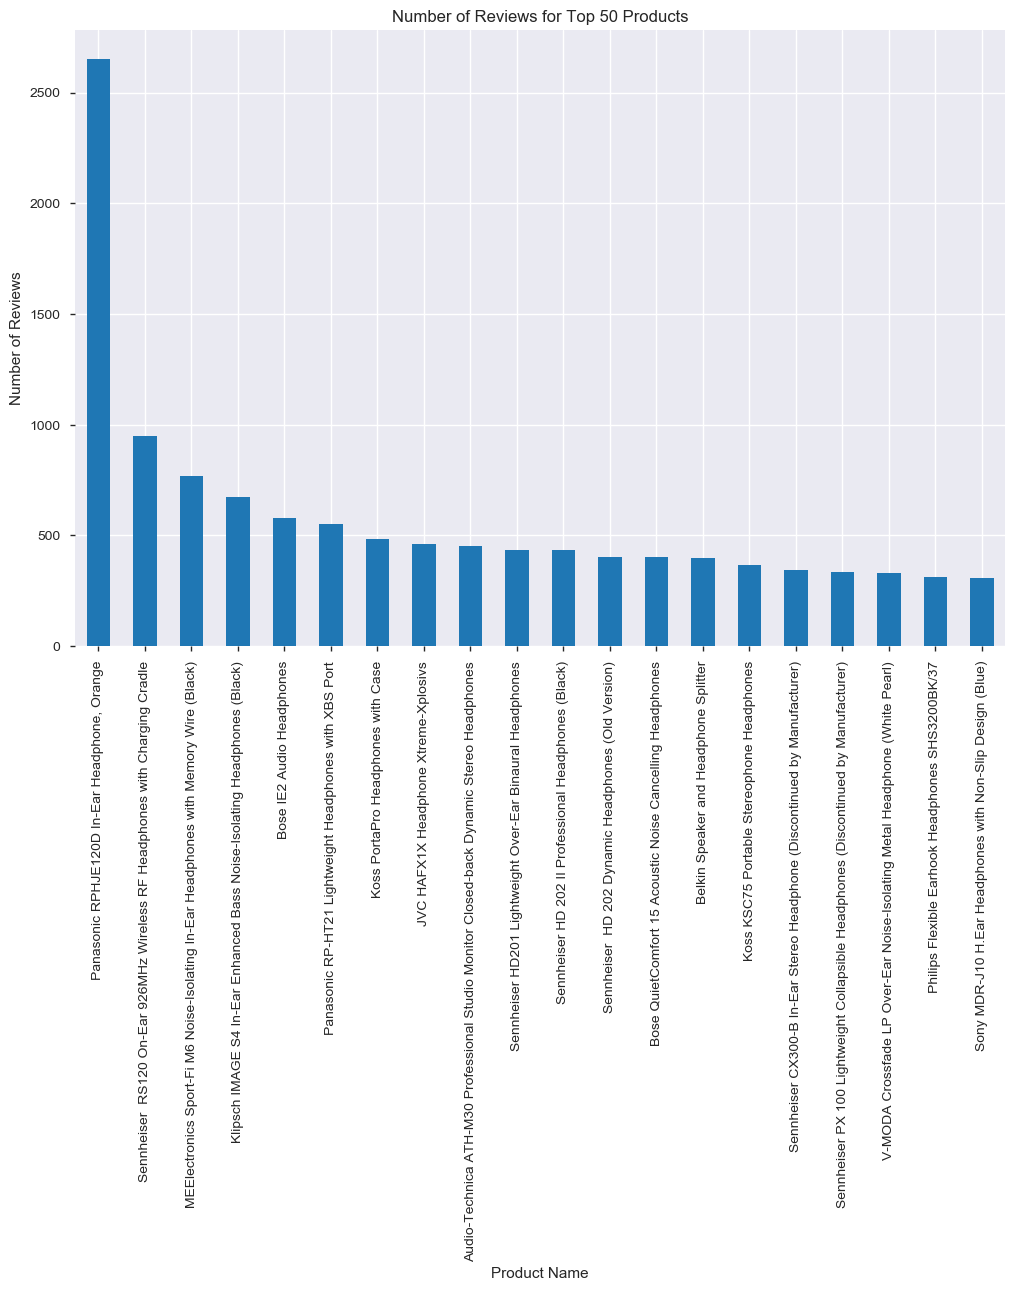

In [12]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = df["product_title"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

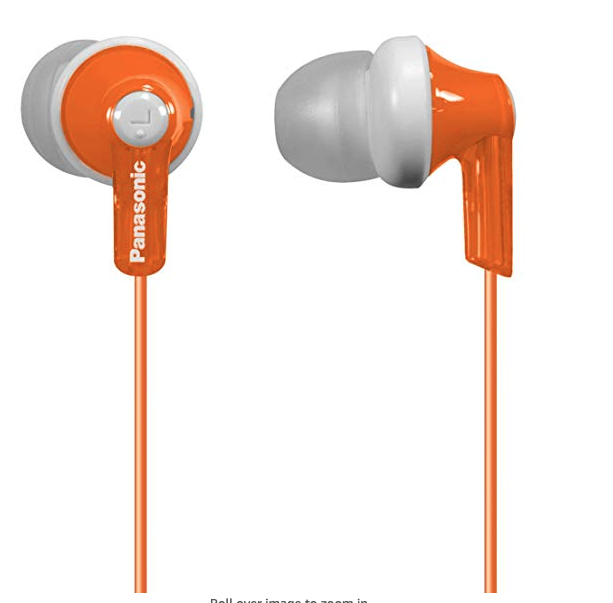

In [13]:
from IPython.display import Image
PATH = "/users/hp/desktop/Ds-springboard/capstone_2/code/"
Image(filename = PATH + "earbud.png", width=500, height=500)


#### low rating and reviews

In [14]:
#j_5 = df[(df['product_id']=="B003ELYQGG") & (df['rating']<2)]
j_5 = df[(df['product_id']=="B003ELYQGG")]

j_5

product_id  rating     reviewer_id  \
760251  B003ELYQGG       3  A3FWI03TTRIWDP   
760252  B003ELYQGG       5  A1L5WUVR2RHCD6   
760253  B003ELYQGG       5  A2R0GTGI2NC5P7   
760254  B003ELYQGG       3   AFT4I4KKUPEQP   
760255  B003ELYQGG       5   AILMTQNLB90RV   
760256  B003ELYQGG       3  A28AHI180H69GK   
760257  B003ELYQGG       5  A245IZCS68ORGE   
760258  B003ELYQGG       2  A312IAWRPUG51C   
760259  B003ELYQGG       4   AM4VDD7C2EZNC   
760260  B003ELYQGG       5  A38DKRR4AITNS5   
760261  B003ELYQGG       5   AJXEHSG4MZZ0U   
760262  B003ELYQGG       4  A1GT4LMA1XSNBZ   
760263  B003ELYQGG       5  A3CYXLY9BX7TBE   
760264  B003ELYQGG       4  A1WNQRXKQZ0EBA   
760265  B003ELYQGG       4  A2I6Q5JUOI2XQE   
760266  B003ELYQGG       5   AUTQINMN7CVM9   
760267  B003ELYQGG       3  A1IMRWGBXOJTWU   
760268  B003ELYQGG       4  A1GT521P0V6IMU   
760269  B003ELYQGG       5  A1UNIHKR24SM3X   
760270  B003ELYQGG       2  A3I8VKL1FVKY0C   
760271  B003ELYQGG       5   AZ7I99MVFQNUC   
760272  B003ELYQGG       5  A28GT8K15D0LIS   
760273  B003ELYQGG       5   ABW2NA00KS8NZ   
760274  B003ELYQGG       3  A2I6O3SYDQO39E   
760275  B003ELYQGG       5  A20DJX8YUAI102   
760276  B003ELYQGG       4  A2V1XO7SDU4XQZ   
760277  B003ELYQGG       5  A217CZW2JWRUIH   
760278  B003ELYQGG       5  A3RWN5RBIOE1JT   
760279  B003ELYQGG       4  A3MVZH8ZFCK1XO   
760280  B003ELYQGG       5  A2CCZN653JH338   
...            ...     ...             ...   
762873  B003ELYQGG       3  A1UE5EDFVFVT88   
762874  B003ELYQGG       5   A9CJOJXVOOLT6   
762875  B003ELYQGG       4  A3EJGJSZ3XCK5Y   
762876  B003ELYQGG       4  A14FD1299PLTV2   
762877  B003ELYQGG       5  A1P2LRONLCFGYF   
762878  B003ELYQGG       4  A27A9ZWUU7HOOP   
762879  B003ELYQGG       5  A2YLUO31ERQT69   
762880  B003ELYQGG       5  A1YEPFLLH42OU1   
762881  B003ELYQGG       5  A1AK0R7058INHE   
762882  B003ELYQGG       5  A1FGGYNW9G5Y50   
762883  B003ELYQGG       5   AILZY0QM7NVX5   
762884  B003ELYQGG       5   ABYB3VC49GFNL   
762885  B003ELYQGG       5  A3VRQD5BAL7RWA   
762886  B003ELYQGG       1  A2N612S1IMBF0X   
762887  B003ELYQGG       5  A14DLGIU4V2Y47   
762888  B003ELYQGG       5  A16PBJIFF00ENN   
762889  B003ELYQGG       4  A3QSO9TQRGFATT   
762890  B003ELYQGG       5  A2OYKZ2IOMINSB   
762891  B003ELYQGG       5  A1POFVVXUZR3IQ   
762892  B003ELYQGG       5  A1DUI08OT52BD5   
762893  B003ELYQGG       4  A39G4M8L6I3CI3   
762894  B003ELYQGG       5  A1GB25VFO7JY7Q   
762895  B003ELYQGG       5  A30M9Z401JAXNI   
762896  B003ELYQGG       2  A1W5EC8U1XB8WZ   
762897  B003ELYQGG       5  A1WLFIY9XOIU1B   
762898  B003ELYQGG       4  A24WFOTXYB6EYJ   
762899  B003ELYQGG       5  A2VL97OABZOWR4   
762900  B003ELYQGG       5  A3K9AOX3G51QP4   
762901  B003ELYQGG       5  A31Q6ALT0O5EBX   
762902  B003ELYQGG       5  A3IUB8248ROY5D   

                                reviewer_name unix_review_time  \
760251                               1GoodDog       2014-05-11   
760252   &#281;&#316;&#261;&#303;&#326;&#281;       2013-02-23   
760253                           2DayShipping       2012-11-07   
760254                                2pacleo       2013-06-06   
760255                                   4lan       2013-01-19   
760256                             68redcedar       2013-08-04   
760257                            A. Alvarado       2014-03-04   
760258                                a-a-ron       2013-06-18   
760259             Aaron J. Kepler "ackepler"       2014-04-16   
760260                            Aaron Osmer       2014-05-30   
760261                            Aaron Schug       2013-12-02   
760262                               abfarris       2013-08-05   
760263         Abhijeet M. Walke "Abhi Walke"       2012-12-04   
760264                                A. Burr       2013-12-10   
760265                                A buyer       2012-07-26   
760266                                  AC300       2013-01-07   
760267                           

In [15]:
apple_fplot = j_5.groupby(['unix_review_time'])['rating'].mean()
apple_fplot

unix_review_time
2010-10-11    3.000000
2010-12-14    4.000000
2010-12-20    5.000000
2011-02-15    5.000000
2011-03-13    5.000000
2011-03-31    3.000000
2011-04-10    5.000000
2011-04-15    5.000000
2011-07-07    1.000000
2011-07-14    5.000000
2011-07-30    4.000000
2011-08-28    5.000000
2011-09-02    5.000000
2011-10-14    1.000000
2011-10-17    4.000000
2011-10-18    5.000000
2011-10-30    4.000000
2011-11-04    5.000000
2011-11-05    3.000000
2011-11-13    5.000000
2011-11-28    5.000000
2011-12-02    4.000000
2011-12-07    5.000000
2011-12-11    5.000000
2011-12-29    5.000000
2011-12-31    5.000000
2012-01-04    5.000000
2012-01-07    4.333333
2012-01-10    5.000000
2012-01-11    3.500000
                ...   
2014-06-13    3.500000
2014-06-14    4.000000
2014-06-16    2.500000
2014-06-17    4.000000
2014-06-18    3.400000
2014-06-19    3.666667
2014-06-20    4.666667
2014-06-21    4.000000
2014-06-22    3.000000
2014-06-23    5.000000
2014-06-24    5.000000
2014-06-25    4.6

In [16]:
print(j_5['review_text'][760287])

There's a reason they're cheap The sound quality is good but the rubber ear guards won't stay on. We've lost nearly all the sizes that come with these because they come off too easily, when inserting or removing from ears.


In [17]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in j_5['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])


['great', 'sound', 'quality', 'affordable', 'price', 'headphones', 'work', 'wonderfully', 'little', 'concern', 'inexpensive', 'cancel', 'noise', 'quite', 'effectively', 'sound', 'quality', 'seem', 'good', 'ear', 'bud', 'headphones', 'previously', 'owened']


In [18]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1


Combien de Mots !!! 7241


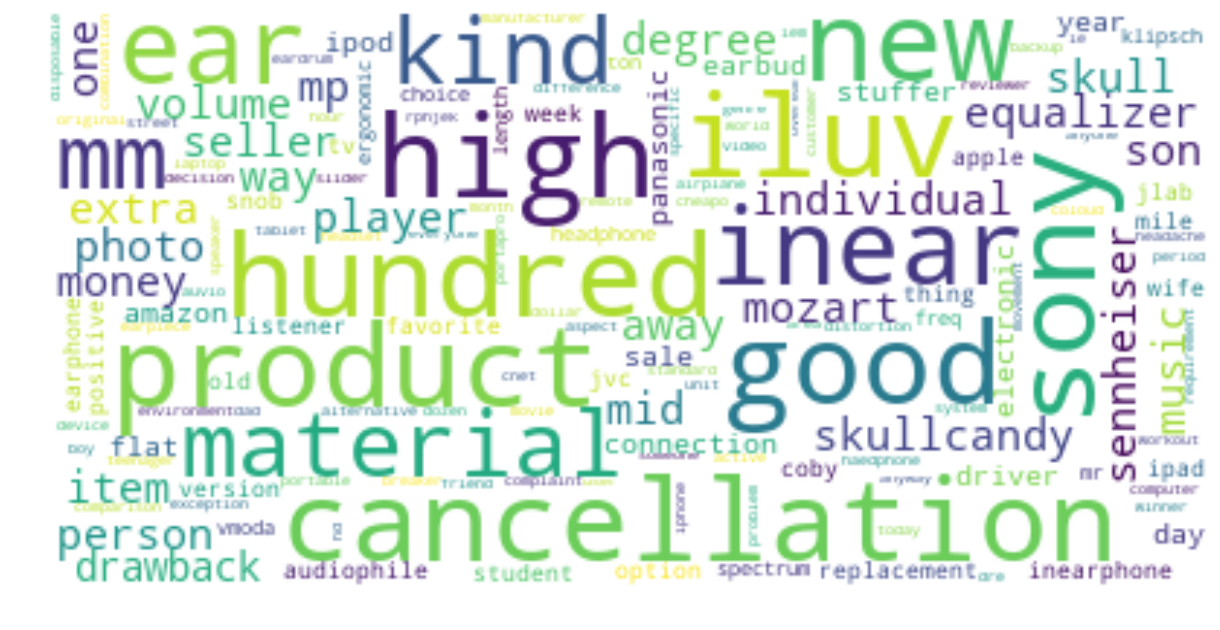

In [19]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words4))


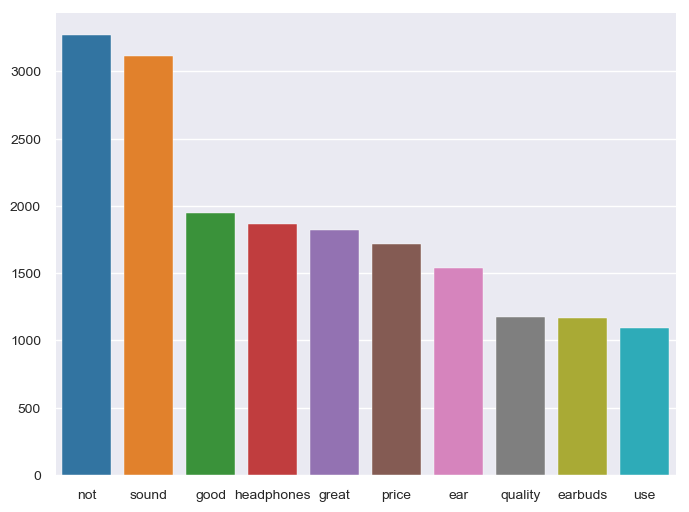

In [20]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

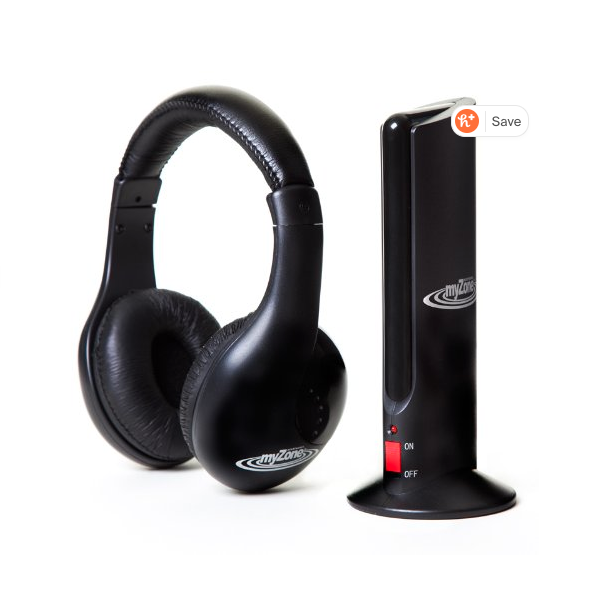

In [21]:
PATH = "/users/hp/desktop/Ds-springboard/capstone_2/code/"
Image(filename = PATH + "earbud1.png", width=500, height=500)


In [22]:
j_1 = df[(df['product_id']=="B005INJ4ZG") & (df['rating']<3)]
j_1

product_id  rating     reviewer_id  \
1149018  B005INJ4ZG       1   A95CSH4O4LBVR   
1149019  B005INJ4ZG       2  A1ZLZD1OUZAJIT   
1149021  B005INJ4ZG       1  A279HF3YE2K8O5   
1149023  B005INJ4ZG       1  A2N3OJ1T4IKZBM   
1149024  B005INJ4ZG       1  A186S5VXG48DDG   
1149025  B005INJ4ZG       1  A2KDAR3YLBMPDL   
1149027  B005INJ4ZG       1  A1N93W09O5GBFS   
1149029  B005INJ4ZG       2  A3577ERF6OVS2Y   
1149031  B005INJ4ZG       1   AMIVH33EO7RIZ   
1149036  B005INJ4ZG       2  A2VRYMER23944K   
1149039  B005INJ4ZG       1   A4EC2NP0PIMC9   
1149041  B005INJ4ZG       1  A1XVBACV4TSGGA   
1149046  B005INJ4ZG       1  A2IBUZECB34CMS   
1149048  B005INJ4ZG       1  A3ROUCBDOMBL3A   
1149050  B005INJ4ZG       1  A2UBS120XE605X   
1149052  B005INJ4ZG       1  A3KI0U254V1A62   
1149053  B005INJ4ZG       1  A2L3TXRP4HS3ZC   
1149056  B005INJ4ZG       1  A39W65E6XMQCGZ   
1149058  B005INJ4ZG       1  A1IR92YXL2IBJQ   
1149059  B005INJ4ZG       1  A3H1XM9IEE7TWU   
1149061  B005INJ4ZG       2  A1R38PNIDDPG67   
1149062  B005INJ4ZG       1  A3FFT9Q8R05L88   
1149063  B005INJ4ZG       1   AL51TV7OIZJ4G   
1149069  B005INJ4ZG       1  A1CD3QE6MASNHH   
1149074  B005INJ4ZG       2   AOJ7PBSDLHJYP   
1149078  B005INJ4ZG       1  A262ONK4P0SV0P   
1149079  B005INJ4ZG       1  A3GYICOW4O57DU   
1149083  B005INJ4ZG       2   AC3SYMA491CW7   
1149084  B005INJ4ZG       1   A26IUBSN1D76M   
1149086  B005INJ4ZG       2   A5LIWNFFAX74G   
1149087  B005INJ4ZG       1  A24W181Y435Z9K   
1149088  B005INJ4ZG       1  A3GR1WOMIYHGU0   
1149093  B005INJ4ZG       1   AR4ANGTNDT5AL   
1149094  B005INJ4ZG       1  A2VTT2A301UY1L   
1149096  B005INJ4ZG       2  A2RU4U1JZ3DMP5   
1149097  B005INJ4ZG       2   AVSCVWUFCUFCR   
1149098  B005INJ4ZG       1   AY43C4V6HP7LB   
1149100  B005INJ4ZG       2   A5NH9B5VYU57T   
1149106  B005INJ4ZG       1  A3PUOGTYHLFWN2   
1149110  B005INJ4ZG       1  A3PCH27PVIAX9A   
1149111  B005INJ4ZG       1   ADQD1WSC0QONA   
1149112  B005INJ4ZG       1   AN0EMR1X0SDT4   
1149114  B005INJ4ZG       1  A1PYMDGN9MYGAR   
1149115  B005INJ4ZG       1    AL53Z5WUHDJL   

                                reviewer_name unix_review_time  \
1149018                 60srocker "60srocker"       2014-01-17   
1149019                              76frakes       2013-02-10   
1149021            Allen Rosenberg "TenThumb"       2013-06-12   
1149023                     anthony delmonico       2013-04-10   
1149024                           A. Olafsson       2013-12-07   
1149025                      A. Rabiee "Rabi"       2013-07-25   
1149027                               Baddley       2013-12-14   
1149029                                 Bfair       2013-11-13   
1149031                      B. L. MacRitchie       2013-10-15   
1149036                            CAS MARINO       2012-11-20   
1149039  Christian M. Mericle "Computer Geek"       2013-12-09   
1149041                  Clifford J. DePriest       2014-02-12   
1149046              D. McCormick "Chief Mac"       2013-03-15   
1149048                                  edsi       2011-12-27   
1149050                           Frank Paris       2012-03-15   
1149052              Fred J. Bobila "Shopper"       2013-08-17   
1149053                              G. Cobos       2013-12-08   
1149056                                   guy       2013-04-01   
1149058            J. A. Hernandez "jensview"       2014-01-21   
1149059                            J. Alberty       2013-06-28   
1149061                  Jay Bagwell "JCBIII"       2013-06-20   
1149062                                JetLag       2011-11-02   
1149063                 Joann L. Allen "Jody"       2013-05-19   
1149069                            jurseygurl       2013-02-11   
1149074                             Katerzena       2013-07-10   
1149078      Leo A. Dubois "yankeeinparadise"       2013-11-07   
1149079                           Leroy Davis       2013-08-15   
1149083                                  Mark

In [23]:
print(j_1['review_text'][1149018])

Lasted three weeks! This 'stuff' lasted three whole weeks!  First, it worked, but was a little 'cheesy' (tinny) sounding, especially when the headset 'volume' was turned up high.  Then, after a couple of weeks, the headphones started getting 'flaky'.  When turned-on, they would not actually work until after about 3-4 minutes.  After a week of this, they stopped working at all.  There were two reasons that I let this go: first, they 'only' cost $13, delivered, second, they were not replaceable!  I would have only netted about 5 bucks on the return, and I threw the original packing away after a week, thinking that they worked OK.I only hope that the new ones that I ordered (actual brand name Sennheiser refurb) are good....


In [24]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in j_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])


['headphones', 'not', 'really', 'work', 'also', 'look', 'review', 'follow', 'directions', 'still', 'could', 'not', 'get', 'work', 'didnt', 'even', 'send', 'back', 'throw', 'right', 'trash']


In [25]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2


Combien de Mots !!! 730


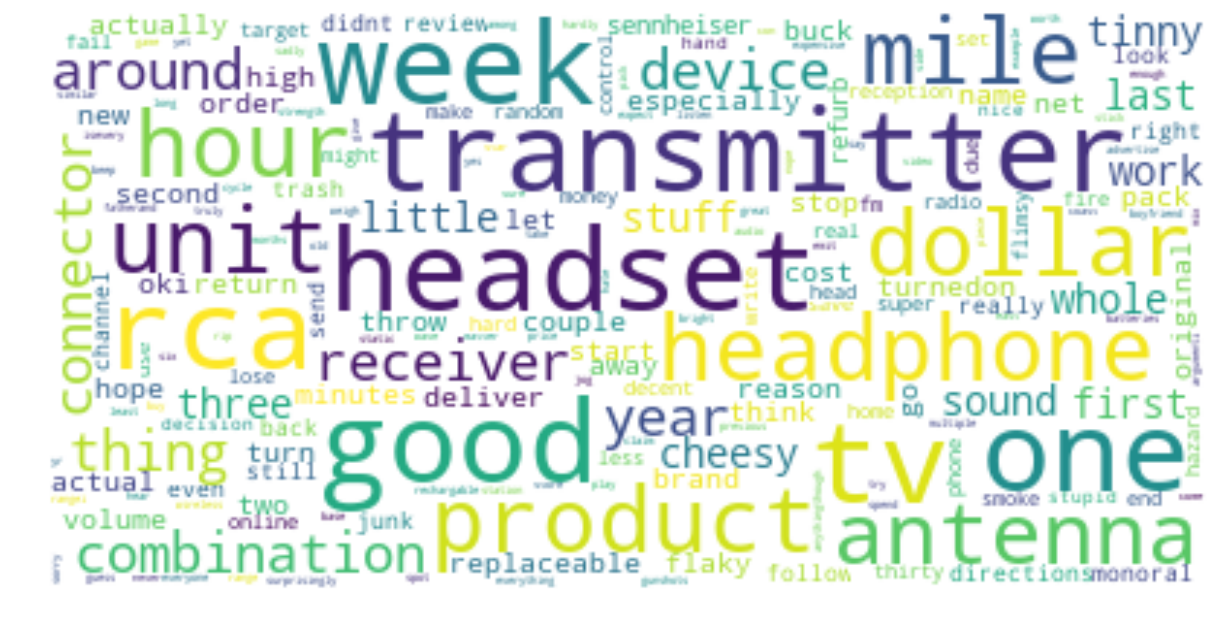

In [26]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words5.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words5))


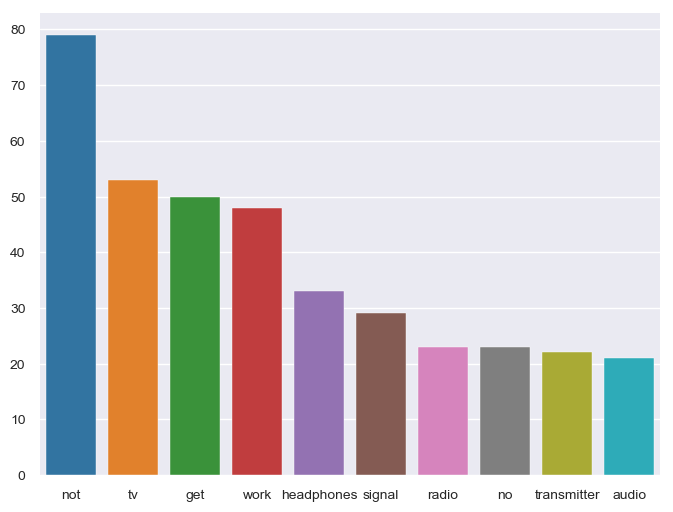

In [27]:
plt.figure(figsize = (8,6))

import seaborn as sns
from sklearn.manifold import TSNE
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

### 1.  "rating_class" and "Review Length" Features

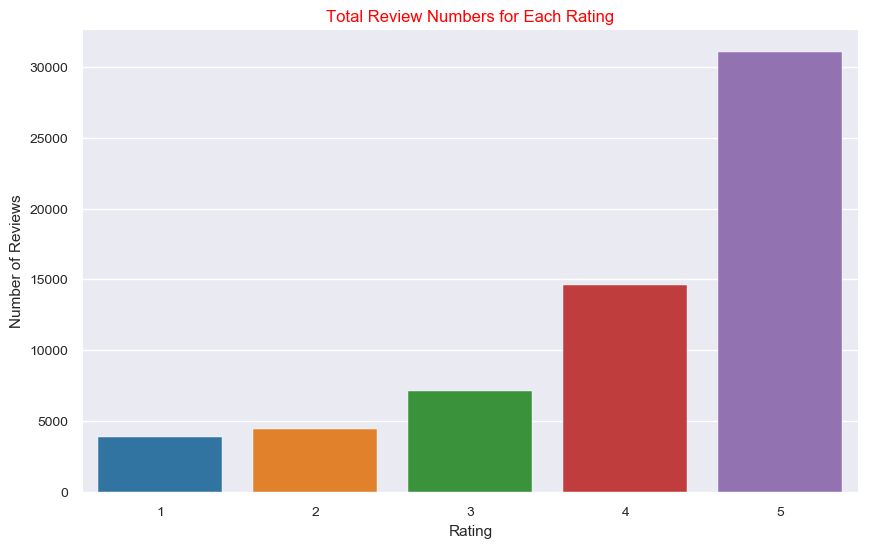

5    31066
4    14639
3     7102
2     4452
1     3870
Name: rating, dtype: int64

In [28]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(df['rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating'].value_counts()

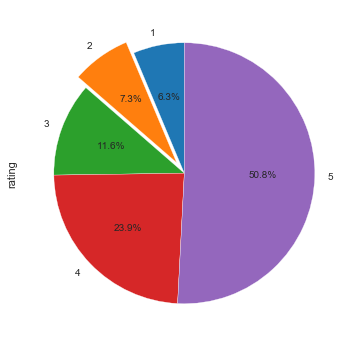

In [29]:
%matplotlib inline
plt.figure(figsize = (10,6))

df.groupby('rating').rating.count()
df.groupby('rating').rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [30]:
#data=review_df.copy()
word_count=[]
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))


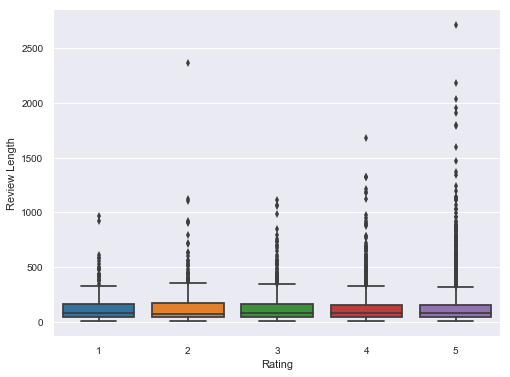

In [31]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()


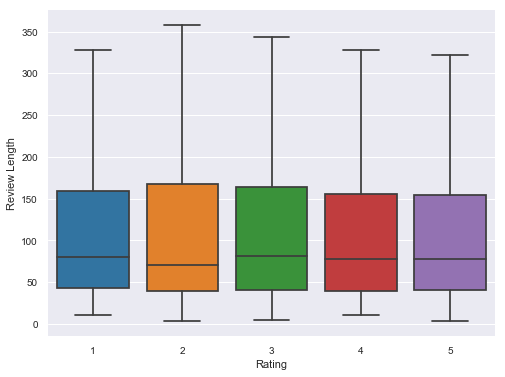

In [32]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

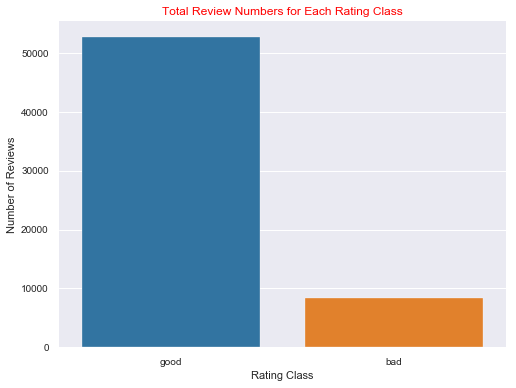

good    52807
bad      8322
Name: rating_class, dtype: int64

In [33]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (8,6))
sns.countplot(df['rating_class'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating_class'].value_counts()

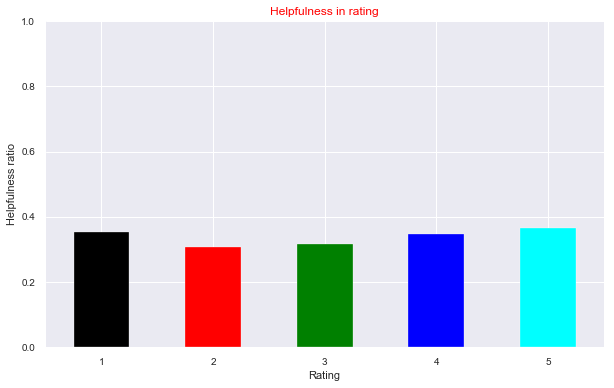

In [34]:
##########################################
## DISTRIBUTION OF RATING FOR HELPFULNESS
########################################## 
plt.figure(figsize = (10,6))
df.groupby('rating')['help_prop'].mean().plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 
plt.title("Helpfulness in rating",color='r')
plt.xlabel("Rating")
plt.ylabel("Helpfulness ratio")
plt.ylim([0, 1])
plt.xticks(rotation=0)
plt.show()


MOst of the customers who bought headphones from amazon were having good rating on the product 
High rating products are less in review length compared to small rating 

### 2. Features

### 2.1. "year" Feature

In [35]:
# Create a year column and drop time column
#df['reviewtime'] = pd.to_datetime(df['time'], format = '%Y %m %d')
# Create a "year" column and drop time column
df['review_time'] = pd.to_datetime(df['review_time'])
df['year'] = df['review_time'].dt.year
df = df.drop('review_time', axis = 1)
df.head(3)

product_id  rating     reviewer_id                  reviewer_name  \
1001391  B004PYD88I       5  A2814AB4U75Q2L                      AlohaKona   
1001392  B004PYD88I       3  A1D0V9EVJQMXIK                Amazon Customer   
1001393  B004PYD88I       2  A2KA0B8FP32CHH  Chesteracorgi "Chesteracorgi"   

        unix_review_time                                                url  \
1001391       2013-03-26  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001392       2013-02-25  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001393       2011-08-22  http://ecx.images-amazon.com/images/I/512ENRj4...   

                                               description  \
1001391  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001392  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001393  VIZIO's Bluetooth Stereo Headphones feature hi...   

                                                categories  \
1001391  [[Electronics, Accessories & Supplies, Audio &...   
1001392  [[Electronics, Accessories & Supplies, Audio &...   
1001393  [[Electronics, Accessories & Supplies, Audio &...   

                                             product_title  price  \
1001391  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   
1001392  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   
1001393  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73   

                                                   related brand_name  \
1001391  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   
1001392  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   
1001393  {'also_viewed': ['B004BW74DO', 'B005PUZO92', '...      VIZIO   

                                               review_text  pos_feedback  \
1001391  Vizio Bluetooth Stereo Headphones I am very pl...             0   
1001392  I have to agree The Good: These headphone pair...             1   
1001393  Uncomfortable and tinny sound I bought these o...             0   

         neg_feedback rating_class  help_prop  \
1001391             0         good        0.0   
1001392             0         good        1.0   
1001393             1          bad        0.0   

                                                clean_text  year  
1001391  vizio bluetooth stereo headphones please headp...  2013  
1001392  agree good headphone pair iphone easily sound ...  2013  
1001393  uncomfortable tinny sound buy read review try ...  2011

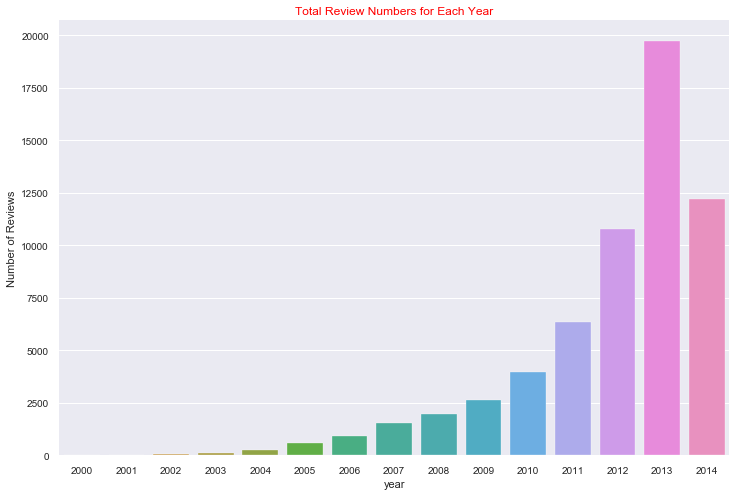

2013    19719
2014    12225
2012    10770
2011     6360
2010     3945
2009     2650
2008     1945
2007     1561
2006      911
2005      602
2004      248
2003      117
2002       45
2000       18
2001       13
Name: year, dtype: int64

In [36]:
##################################################################
# Total review for every year in the Headphone product
#####################################################################
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

Except 2002, 'good ratings' percentage is progressing over 92%. 2002 has the lowest good ratings with 88% overall (There are only 25 reviews). 'good ratings' percentage is 100% in 2000 (10 reviews) and 2001 (16 reviews). As it might be seen in the graph, the overall good rating is progressing between 93% and 97% in home and kitchen products.

### 2.2. "customer" Feature

#### Unique Customers

In [37]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(df['reviewer_id'].unique())))

Number of unique customers: 42062


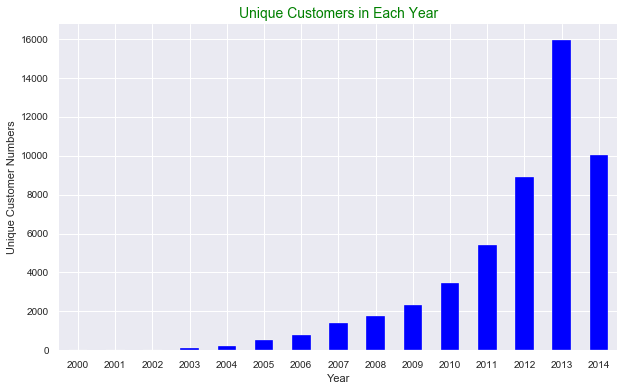

year
2000       15
2001       12
2002       41
2003      105
2004      222
2005      521
2006      795
2007     1398
2008     1742
2009     2334
2010     3467
2011     5423
2012     8899
2013    15970
2014    10051
Name: reviewer_id, dtype: int64


In [38]:
# How many unique customers in each year?
unique_cust = df.groupby('year')['reviewer_id'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0, colors = 'b')
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

#### How many unique customers do we have in each rating class?

In [39]:
# unique customers for each "rating class"
a = list(df.groupby(['rating_class'])['reviewer_id'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                 7424               8322
1         good                37696              52807


Comment:
* Here, "customer uniqueness" computed as a metric of "rating class"
* The purpose is undertsanding "how much are the reviews made by different customers 
  or how much are they populated by same customers.
* For instance, number of customers of "rating class bad " is 699 (nearly 50% of all customers), and they made only 5% (1276) of all reviews, this means 95% of the reviews are given by customers whose rating class is good.
* And some customers are populating the review rates which may effect the test scores negatively.
* For a detailed work, this small nuances can make difference and it may be requried to handle them.

### 2.3. "product" Feature

In [40]:
# Print number of unique home and kitchen products in the dataset
print('Number of unique home and kitchen products: {}'.format(len(df['product_id'].unique())))

Number of unique home and kitchen products: 1878


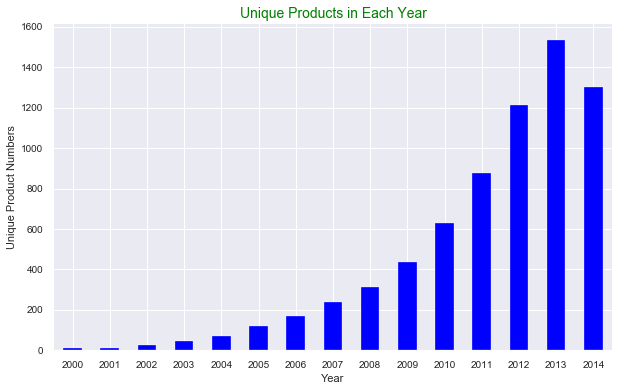

year
2000       9
2001      13
2002      25
2003      47
2004      73
2005     122
2006     168
2007     238
2008     311
2009     436
2010     631
2011     875
2012    1212
2013    1537
2014    1302
Name: product_id, dtype: int64


In [41]:
# How many unique products in each year?
unique_prod = df.groupby('year')['product_id'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', colors = 'b', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

We have total 1171 unique products in the dataset which belongs to year between 2000 and 2014. As it may be observed in the chart and table, the number of unique products for each year has increased generally with the progress of the year except 2014. There is a slight decrease in 2014 but we have only data until June in 2014.

### 2.4. "review_ length" Feature

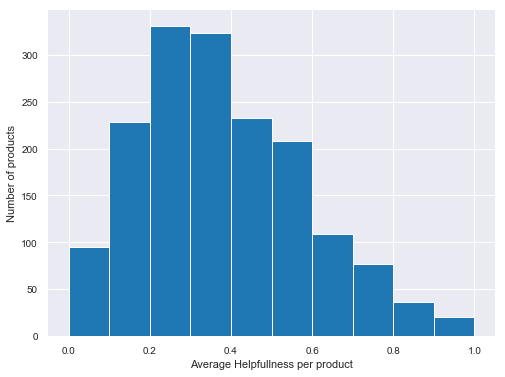

In [42]:
##########################################
## DISTRIBUTION OF RATING IN PRODUCTS
########################################## 
plt.figure(figsize = (8,6))

df1 = df.copy()
df1 = df1[np.isfinite(df1['help_prop'])]
grp = df1.groupby('product_id')
counts = grp.product_id.count()        # number of reviews by each critic
means = grp.help_prop.mean()     # average freshness for each critic

means[counts > 5].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average Helpfullness per product")
plt.ylabel("Number of products")
plt.show()


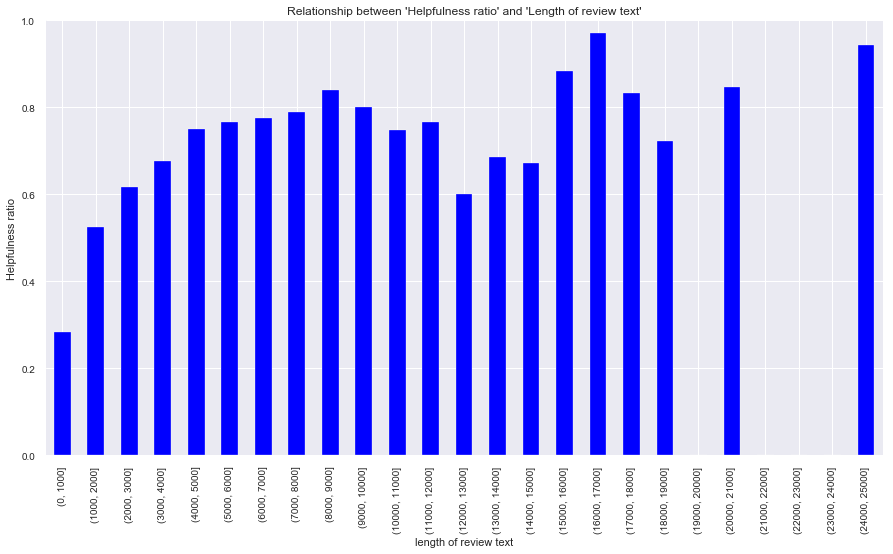

In [43]:
##########################################
## HELPFULNESS FOR LENGTH OF TEXT
########################################## 
plt.figure(figsize = (15,8))

df1['text_len'] = df1.review_text.apply(len)
maxTextLen = max(df1.text_len)
df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen+1000,1000)))['help_prop'].mean().plot(kind='bar',colors='b')
plt.xlabel("length of review text")
plt.ylabel("Helpfulness ratio")
plt.title("Relationship between 'Helpfulness ratio' and 'Length of review text'")
plt.ylim([0, 1])

plt.show()


Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

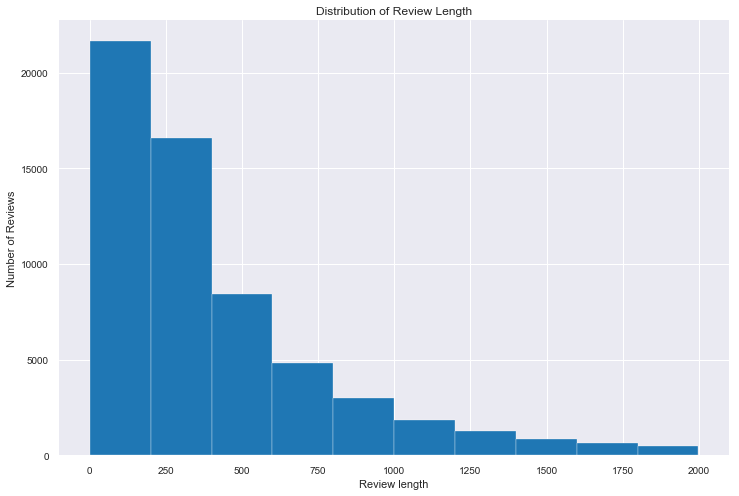

In [44]:
##########################################
## PLOT DISTRIBUTION OF REVIEW LENGTH   
##########################################
plt.figure(figsize = (15,8))

review_length = df["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

(0, 1)

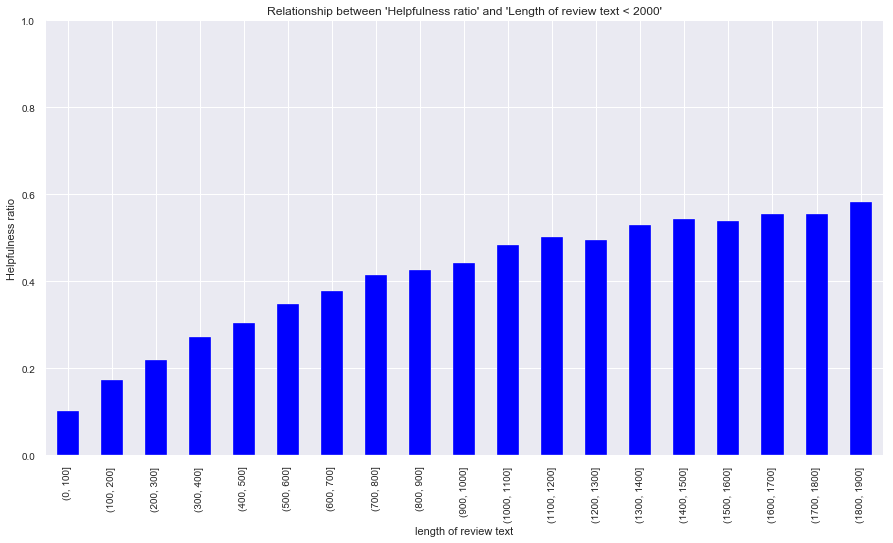

In [45]:
############################################
## check helpfulness ration below 2000 words
#############################################
plt.figure(figsize = (15,8))

df1['text_len'] = df1.review_text.apply(len)
maxTextLen = 2000
df1.groupby(pd.cut(df1['text_len'], np.arange(0,maxTextLen,100)))['help_prop'].mean().plot(kind='bar',colors='b')
plt.xlabel("length of review text")
plt.ylabel("Helpfulness ratio")
plt.title("Relationship between 'Helpfulness ratio' and 'Length of review text < 2000'")
plt.ylim([0, 1])


In [46]:
##########################################
## LABEL HELPFULNESS
#########################################
import numpy as np

def label_Helpfulness(row):
    if row['help_prop'] > 0.75:
           return 'helpful'
    else: 
           return 'unhelpful'

df1['helpIndx'] = df1.apply(label_Helpfulness, axis=1)

df1.head(2)

product_id  rating     reviewer_id    reviewer_name unix_review_time  \
1001391  B004PYD88I       5  A2814AB4U75Q2L        AlohaKona       2013-03-26   
1001392  B004PYD88I       3  A1D0V9EVJQMXIK  Amazon Customer       2013-02-25   

                                                       url  \
1001391  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001392  http://ecx.images-amazon.com/images/I/512ENRj4...   

                                               description  \
1001391  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001392  VIZIO's Bluetooth Stereo Headphones feature hi...   

                                                categories  \
1001391  [[Electronics, Accessories & Supplies, Audio &...   
1001392  [[Electronics, Accessories & Supplies, Audio &...   

                                             product_title  price  ...  \
1001391  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   
1001392  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   

        brand_name                                        review_text  \
1001391      VIZIO  Vizio Bluetooth Stereo Headphones I am very pl...   
1001392      VIZIO  I have to agree The Good: These headphone pair...   

        pos_feedback  neg_feedback  rating_class help_prop  \
1001391            0             0          good       0.0   
1001392            1             0          good       1.0   

                                                clean_text  year  text_len  \
1001391  vizio bluetooth stereo headphones please headp...  2013       188   
1001392  agree good headphone pair iphone easily sound ...  2013       539   

          helpIndx  
1001391  unhelpful  
1001392    helpful  

[2 rows x 21 columns]

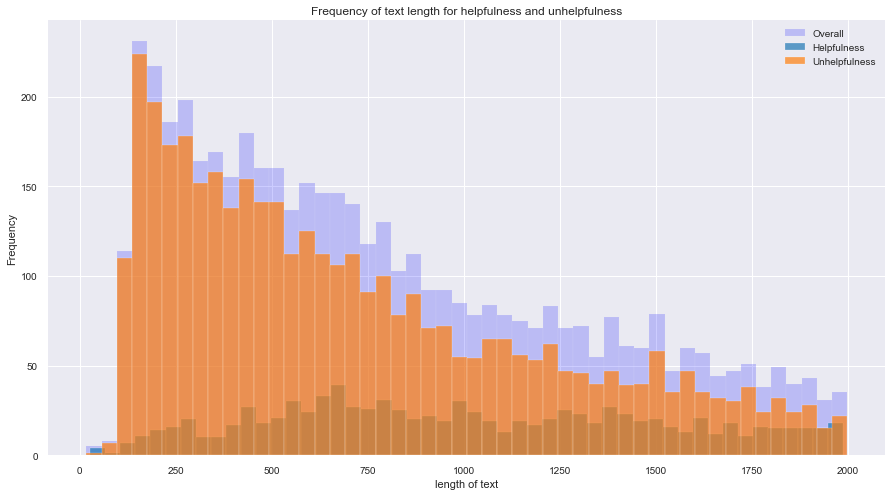

In [47]:
##########################
## TEXT LENGTH  
########################### 
plt.figure(figsize = (15,8))

subset_df1 = df1[(df1.neg_feedback>=2) & (df1.text_len>=2)]


subset_df1.text_len[subset_df1.text_len<2000].plot(bins=50, kind='hist',alpha=0.2,colors='b')
dhelp = subset_df1.text_len[(subset_df1['helpIndx']=='helpful') & (subset_df1.text_len<2000)]
dunhelp = subset_df1.text_len[(subset_df1['helpIndx']=='unhelpful') & (subset_df1.text_len<2000)]

dhelp.plot(bins=50, kind='hist', alpha=0.7)
dunhelp.plot(bins=50, kind='hist',alpha=0.7)

plt.legend(['Overall', 'Helpfulness', 'Unhelpfulness'])
plt.xlabel("length of text")
plt.ylabel("Frequency")
plt.title("Frequency of text length for helpfulness and unhelpfulness")
plt.show()


In [48]:
# Let's see how the rating classes change for each year in a table and graph.
# Create a dataframe which shows the relationship between review numbers and rating classes for each year

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

Year  Total Reviews  Relevant Rating Number  \
0   2000             18                      16   
1   2001             13                       9   
2   2002             45                      39   
3   2003            117                     101   
4   2004            248                     201   
5   2005            602                     488   
6   2006            911                     765   
7   2007           1561                    1318   
8   2008           1945                    1650   
9   2009           2650                    2216   
10  2010           3945                    3335   
11  2011           6360                    5383   
12  2012          10770                    9208   
13  2013          19719                   17358   
14  2014          12225                   10720   

    % of Relevant Rating Number in This Year  \
0                                  88.888889   
1                                  69.230769   
2                                  86.666667   
3                                  86.324786   
4                                  81.048387   
5                                  81.063123   
6                                  83.973655   
7                                  84.433056   
8                                  84.832905   
9                                  83.622642   
10                                 84.537389   
11                                 84.638365   
12                                 85.496750   
13                                 88.026776   
14                                 87.689162   

    % of Relevant Rating in the Total  
0                            0.071349  
1                            0.040134  
2                            0.173913  
3                            0.450390  
4                            0.896321  
5                            2.176143  
6                            3.411371  
7                            5.877369  
8                            7.357860  
9                            9.881828  
10                          14.871795  
11                          24.004459  
12                          41.061315  
13                          77.404682  
14                          47.803790

<Figure size 864x576 with 0 Axes>

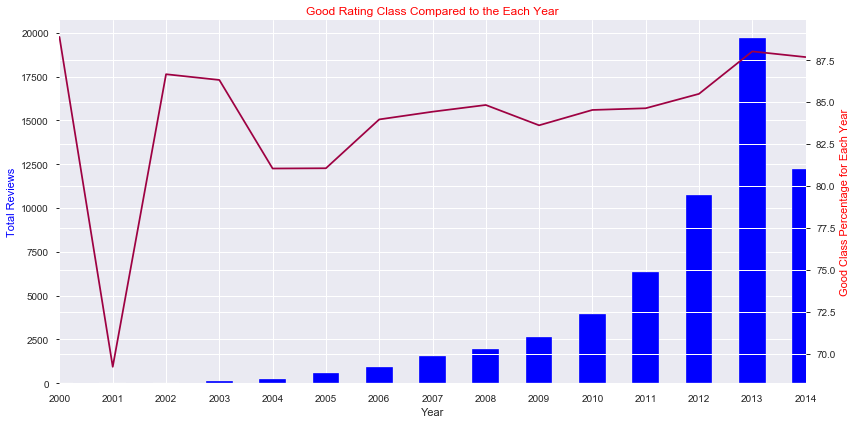

In [49]:
##################################################################
# Create a graph for each rating class to compare within the years
##################################################################

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [50]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['token'] = df['clean_text'].apply(token)

In [51]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

product_id  rating     reviewer_id                  reviewer_name  \
1001391  B004PYD88I       5  A2814AB4U75Q2L                      AlohaKona   
1001392  B004PYD88I       3  A1D0V9EVJQMXIK                Amazon Customer   
1001393  B004PYD88I       2  A2KA0B8FP32CHH  Chesteracorgi "Chesteracorgi"   

        unix_review_time                                                url  \
1001391       2013-03-26  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001392       2013-02-25  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001393       2011-08-22  http://ecx.images-amazon.com/images/I/512ENRj4...   

                                               description  \
1001391  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001392  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001393  VIZIO's Bluetooth Stereo Headphones feature hi...   

                                                categories  \
1001391  [[Electronics, Accessories & Supplies, Audio &...   
1001392  [[Electronics, Accessories & Supplies, Audio &...   
1001393  [[Electronics, Accessories & Supplies, Audio &...   

                                             product_title  price  ...  \
1001391  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   
1001392  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   
1001393  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   

                                               review_text pos_feedback  \
1001391  Vizio Bluetooth Stereo Headphones I am very pl...            0   
1001392  I have to agree The Good: These headphone pair...            1   
1001393  Uncomfortable and tinny sound I bought these o...            0   

        neg_feedback  rating_class  help_prop  \
1001391            0          good        0.0   
1001392            0          good        1.0   
1001393            1           bad        0.0   

                                                clean_text  year  \
1001391  vizio bluetooth stereo headphones please headp...  2013   
1001392  agree good headphone pair iphone easily sound ...  2013   
1001393  uncomfortable tinny sound buy read review try ...  2011   

        rating_class_num                                              token  \
1001391                1  [vizio, bluetooth, stereo, headphones, please,...   
1001392                1  [agree, good, headphone, pair, iphone, easily,...   
1001393                0  [uncomfortable, tinny, sound, buy, read, revie...   

         review_length  
1001391             32  
1001392            114  
1001393             96  

[3 rows x 22 columns]

In [52]:
# Create review length bin feature
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,4800,100))
df.head()

product_id  rating     reviewer_id                  reviewer_name  \
1001391  B004PYD88I       5  A2814AB4U75Q2L                      AlohaKona   
1001392  B004PYD88I       3  A1D0V9EVJQMXIK                Amazon Customer   
1001393  B004PYD88I       2  A2KA0B8FP32CHH  Chesteracorgi "Chesteracorgi"   
1001394  B004PYD88I       4  A195XHKRB3IGSY                eveningstargems   
1001395  B004PYD88I       4  A2F4XBBGUXM19V       Gary A. Drury "Techman1"   

        unix_review_time                                                url  \
1001391       2013-03-26  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001392       2013-02-25  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001393       2011-08-22  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001394       2012-08-14  http://ecx.images-amazon.com/images/I/512ENRj4...   
1001395       2013-09-09  http://ecx.images-amazon.com/images/I/512ENRj4...   

                                               description  \
1001391  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001392  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001393  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001394  VIZIO's Bluetooth Stereo Headphones feature hi...   
1001395  VIZIO's Bluetooth Stereo Headphones feature hi...   

                                                categories  \
1001391  [[Electronics, Accessories & Supplies, Audio &...   
1001392  [[Electronics, Accessories & Supplies, Audio &...   
1001393  [[Electronics, Accessories & Supplies, Audio &...   
1001394  [[Electronics, Accessories & Supplies, Audio &...   
1001395  [[Electronics, Accessories & Supplies, Audio &...   

                                             product_title  price  ...  \
1001391  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   
1001392  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   
1001393  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   
1001394  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   
1001395  VIZIO XVTHB100 Bluetooth Stereo Headphones (Bl...   1.73  ...   

        pos_feedback neg_feedback rating_class  help_prop  \
1001391            0            0         good        0.0   
1001392            1            0         good        1.0   
1001393            0            1          bad        0.0   
1001394            1            0         good        1.0   
1001395            0            0         good        0.0   

                                                clean_text  year  \
1001391  vizio bluetooth stereo headphones please headp...  2013   
1001392  agree good headphone pair iphone easily sound ...  2013   
1001393  uncomfortable tinny sound buy read review try ...  2011   
1001394  sound quality perfect battery life great charg...  2012   
1001395  vizio bluetooth stereo headphones xvthb purcha...  2013   

         rating_class_num                                              token  \
1001391                 1  [vizio, bluetooth, stereo, headphones, please,...   
1001392                 1  [agree, good, headphone, pair, iphone, easily,...   
1001393                 0  [uncomfortable, tinny, sound, buy, read, revie...   
1001394                 1  [sound, quality, perfect, battery, life, great...   
1001395                 1  [vizio, bluetooth, stereo, headphones, xvthb, ...   

         review_length  review_length_bin  
1001391             32           (0, 100]  
1001392            114         (100, 200]  
1001393             96           (0, 100]  
1001394            307         (300, 400]  
1001395            540         (500, 600]  

[5 rows x 23 columns]

In [53]:
# Good rating percentages for each length bin with 50's
per_pos_length = df.groupby(['review_length_bin'])['rating_class_num'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         86.374560
(100, 200]       84.525939
(200, 300]       86.992840
(300, 400]       87.463810
(400, 500]       88.933257
(500, 600]       90.498155
(600, 700]       90.963855
(700, 800]       91.154791
(800, 900]       90.136054
(900, 1000]      95.505618
(1000, 1100]     94.915254
(1100, 1200]     93.457944
(1200, 1300]     98.591549
(1300, 1400]     95.918367
(1400, 1500]    100.000000
(1500, 1600]     93.333333
(1600, 1700]     86.956522
(1700, 1800]    100.000000
(1800, 1900]     92.857143
(1900, 2000]     85.714286
(2000, 2100]    100.000000
(2100, 2200]     90.909091
(2200, 2300]    100.000000
(2300, 2400]     90.000000
(2400, 2500]    100.000000
(2500, 2600]    100.000000
(2600, 2700]    100.000000
(2700, 2800]    100.000000
(2800, 2900]    100.000000
(2900, 3000]      0.000000
(3000, 3100]    100.000000
(3100, 3200]    100.000000
(3200, 3300]    100.000000
(3300, 3400]    100.000000
(3400, 3500]    100.000000
(3500, 3600]    100.000000
(3600, 370

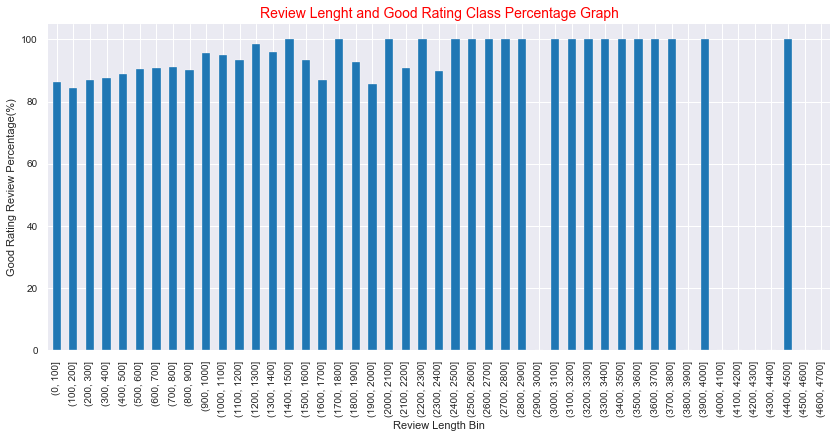

In [54]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

As it might be seen the graph, the highest percentage of good rating reviews lies between 0-1000 words with 96.2% whereas lowest percentage of good rating reviews lies between 1700-1800 words with 66.6%. As the review length extends, the good rating tends to increase.  Generally, the customers who have write longer reviews (more than 1900 words) tends to give good ratings.

### 2.5. "pos_feedback" Feature

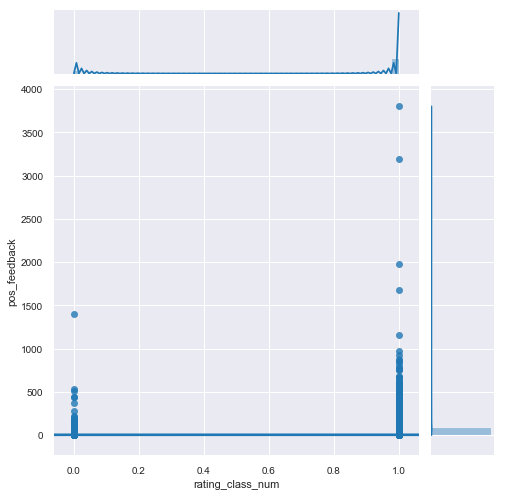

In [55]:
# Correlation between rating_class_num and positive feedback 
sns.jointplot(x ='rating_class_num', y = 'pos_feedback', data = df, kind = 'reg', size = 7)

There is a slightly negative correlation between rating class and positive feedback. This relationship has no importance. 

### 2.6. "neg_feedback" Feature

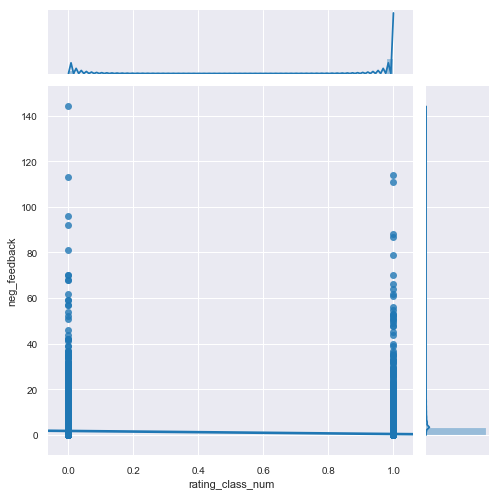

In [56]:
# Correlation between rating_class_num and negative feedback 
sns.jointplot(x ='rating_class_num', y = 'neg_feedback', data = df, kind = 'reg', size = 7)

Like positive correlation, there is a slightly negative correlation between rating class and negative feedback. This relationship has no importance. 

#### Correlation Between Numeric Variables

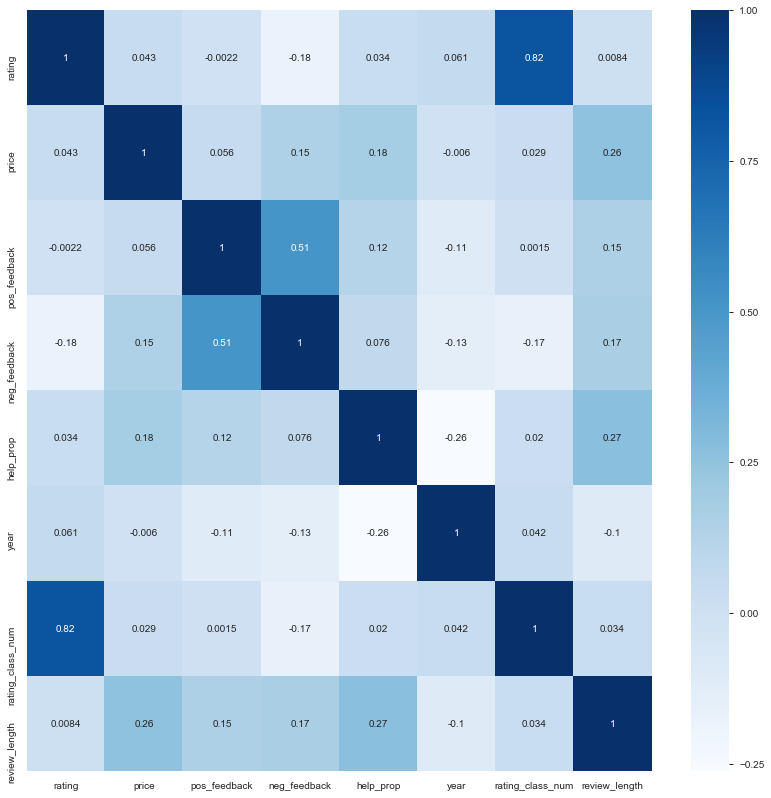

In [57]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(df.corr(method="pearson"), cmap='Blues', annot = True)

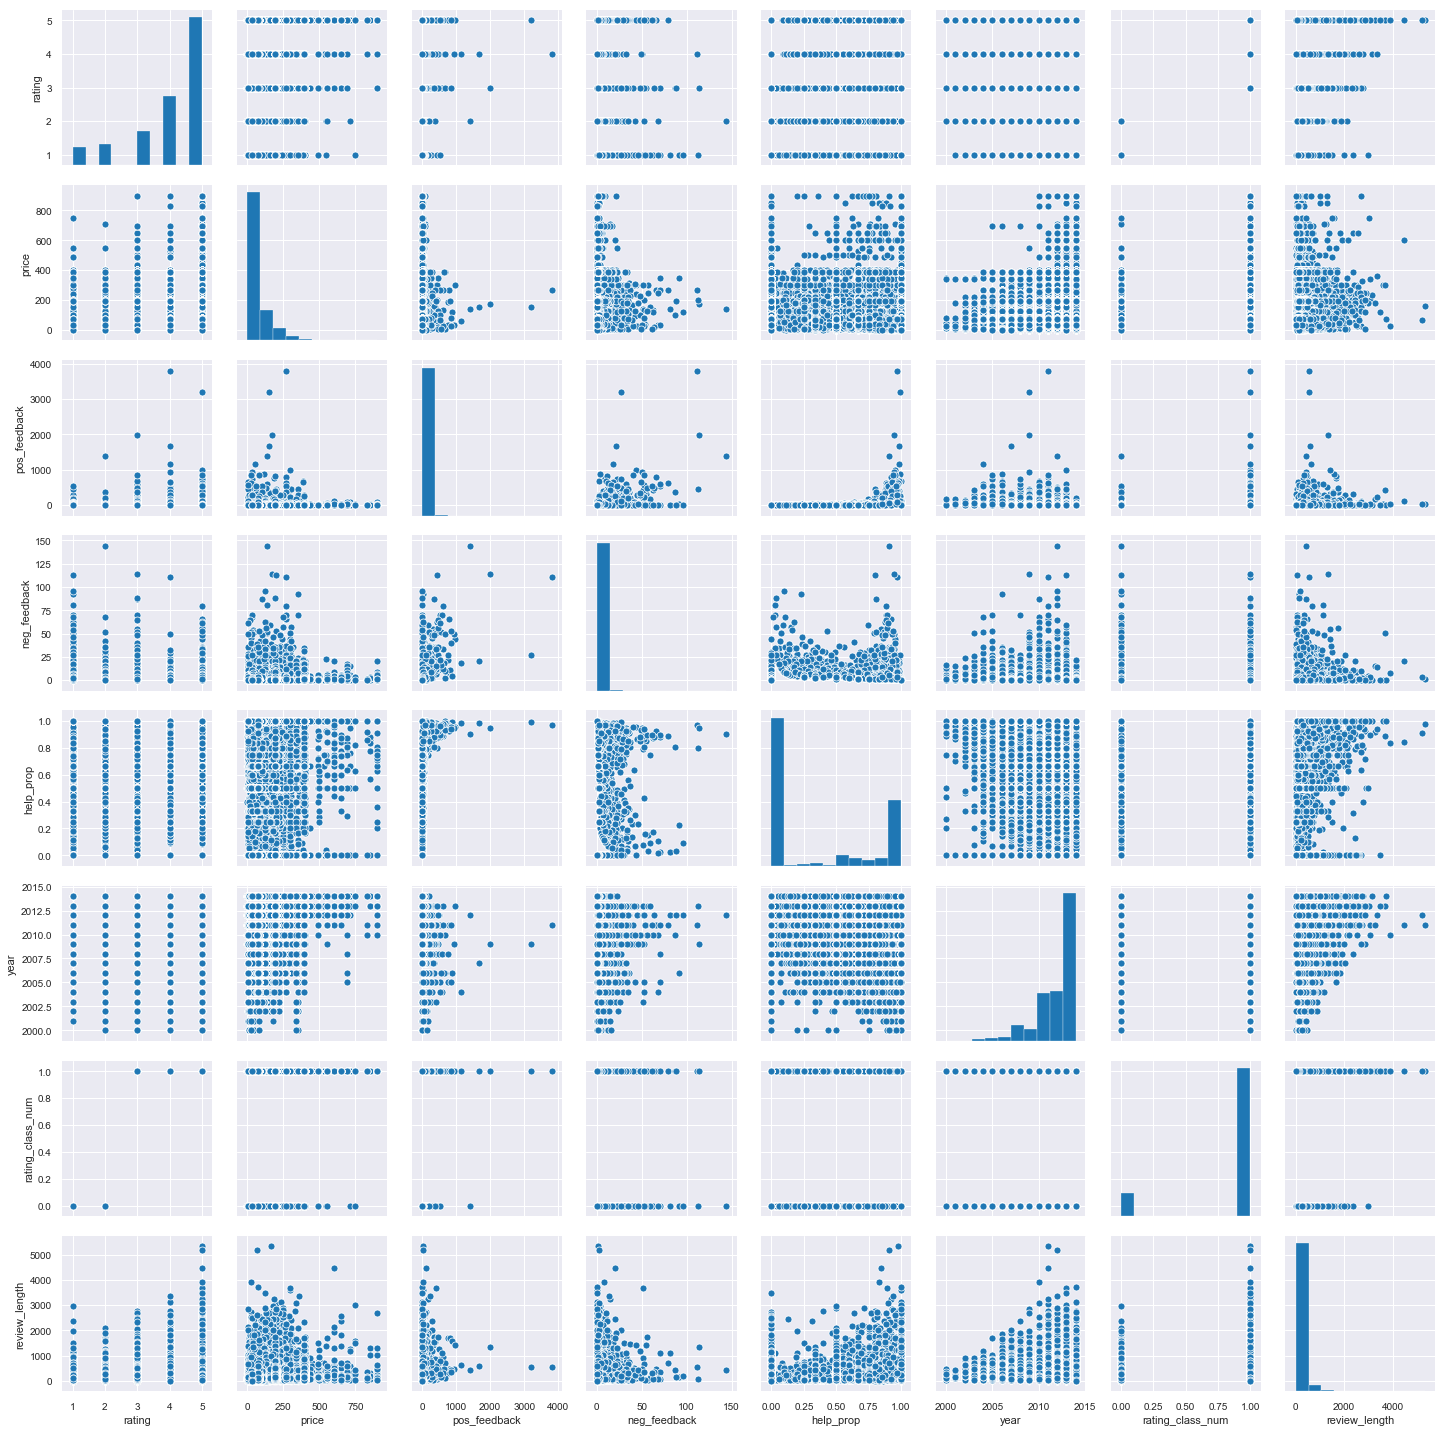

In [58]:
sns.pairplot(df)

### Due to computational considerations, I will reduce reduce the number of observations. I will drop good rating class reviews longer than 150 words, and I will drop all observations earlier than year 2010.

In [59]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_class'] == 'good')].index)

In [60]:
df4 = df3.drop(df3[(df3['year'] < 2010)].index)
df4=df4.head(15000)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1001391 to 1680311
Data columns (total 23 columns):
product_id           15000 non-null object
rating               15000 non-null int64
reviewer_id          15000 non-null object
reviewer_name        15000 non-null object
unix_review_time     15000 non-null datetime64[ns]
url                  15000 non-null object
description          15000 non-null object
categories           15000 non-null object
product_title        15000 non-null object
price                15000 non-null float64
related              15000 non-null object
brand_name           15000 non-null object
review_text          15000 non-null object
pos_feedback         15000 non-null int64
neg_feedback         15000 non-null int64
rating_class         15000 non-null object
help_prop            15000 non-null float64
clean_text           15000 non-null object
year                 15000 non-null int64
rating_class_num     15000 non-null int64
token             

In [61]:
df4.head(50)

product_id  rating     reviewer_id  \
1001391  B004PYD88I       5  A2814AB4U75Q2L   
1001392  B004PYD88I       3  A1D0V9EVJQMXIK   
1001393  B004PYD88I       2  A2KA0B8FP32CHH   
1001396  B004PYD88I       1  A3K2Y8JBW9X1EJ   
1001401  B004PYD88I       3  A3PCEB9ND82AGE   
1001402  B004PYD88I       5  A2LXTXJC1Z3S8Z   
1001403  B004PYD88I       2  A2P9IRJDUQB6L1   
1001405  B004PYD88I       1  A3K3PEW2KDYCWC   
1001406  B004PYD88I       5   A2JVXYTX4B4RC   
1001407  B004PYD88S       2   ACYQPNSSB0KVG   
1001408  B004PYD88S       2  A24QHWMI9VHMZT   
1001409  B004PYD88S       5   A7SSO0H5OJ0PU   
1001410  B004PYD88S       5  A2GTBEL7DQCHPM   
1001411  B004PYD88S       2  A18HMSBP37Q8QO   
1001413  B004PYD88S       2  A19DGUBD98YLPP   
1001417  B004PYD8S8       5  A2PNZ8PEVSJMGM   
1001418  B004PYD8S8       5   AX1D247AREH22   
1001419  B004PYD8S8       1  A234L2MBIN7BIA   
1001420  B004PYD8S8       2  A3VJXBEQ8GFV9M   
1001421  B004PYD8S8       5  A28DX7P2JEU8Y4   
1001423  B004PYD8S8       5  A19AGK07RP4KT4   
1001424  B004PYD8S8       4  A17D9IY8U9O4LN   
1001425  B004PYD8S8       5   ABYHSRQ67MN8P   
1001426  B004PYD8S8       5   A6GJRV71ODNGZ   
1001427  B004PYD8S8       5  A3FCXL4ALTD3GI   
1001428  B004PYD8S8       5  A11O09HFDUW1IJ   
1001429  B004PYD8S8       5   AJT47Q6A41V91   
1001431  B004PYD8S8       5   AW5B1V9DXC92Y   
1001432  B004PYD8S8       2  A31ZO2G7KA11AR   
1001433  B004PYD8S8       5   AQ6WE0N4NU6I0   
1001434  B004PYD8S8       5  A3A3MX94U0QVW3   
1005354  B004QK44K2       4  A1KL8RTE5SSVNB   
1005355  B004QK44K2       4   AOTSF3WSDP6R3   
1005356  B004QK44K2       5  A2VB886VH8HVBF   
1005357  B004QK44K2       5   ARJTCVHAEA6X6   
1005358  B004QK44K2       4   A96AON1A885W9   
1007397  B004QMH8KI       3  A29MGPE27PZ6NX   
1007402  B004QMH8KI       5  A2GA57EGD2JM5W   
1007403  B004QMH8KI       3  A16XF508VU5GCJ   
1007404  B004QMH8KI       5  A2J8NCGR14OSJG   
1007406  B004QMH8KI       4  A2N89YVH2LB3PA   
1007410  B004QMH8KI       5  A3077MQTAKOVFZ   
1007411  B004QMH8KI       5  A1RJXO99BU5ZU5   
1007413  B004QMH8KI       3  A2IOS83OR5QPZQ   
1008236  B004QTSRTM       5  A3AHA3LTY0O0RV   
1008237  B004QTSRTM       5  A37TND3OH08L98   
1008238  B004QTSRTM       2  A3L5XLVG87VPP2   
1008239  B004QTSRTM       2  A32J2EH4V9XY7M   
1008240  B004QTSRTM       5   AL7AQ7ZPMVR9H   
1008241  B004QTSRTM       5   ADALB4YL345H8   

                                             reviewer_name unix_review_time  \
1001391                                          AlohaKona       2013-03-26   
1001392                                    Amazon Customer       2013-02-25   
1001393                      Chesteracorgi "Chesteracorgi"       2011-08-22   
1001396                                         Heisenberg       2012-08-04   
1001401                                           maj71303       2013-04-30   
1001402                                  nieves de carmona       2013-02-09   
1001403                                        Nort Thalem       2012-09-02   
1001405                                                Ron       2013-01-22   
1001406                              Virginia L. Armstrong       2013-09-18   
1001407                                    Amazon Customer       2012-08-30   
1001408                                          Daniel V.       2013-07-07   
1001409                                              Dgarl       2011-12-05   
1001410                                  ffabric "ffabric"       2012-12-09   
1001411                                   James E. Seidule       2013-11-05   
1001413                                           M. Baker       2011-05-13   
1001417                                  A. Hosana "WANDL"       2014-04-21   
1001418                                          AlphaTrio       2014-07-07   
1001419                                        Asha Conley       2014-02-20   
1001420                                        Avid Reader       2014-02-26   
1001421                        

In [62]:
df['review_length'].describe()

count    61129.000000
mean       165.592534
std        206.551747
min          2.000000
25%         53.000000
50%        101.000000
75%        199.000000
max       5330.000000
Name: review_length, dtype: float64

### 2.7. "clean_text" Feature

In [62]:
# Create a new data frame with clean text and rating class number
df5 = df4[["clean_text", "rating_class_num"]].reset_index()
df5.head(10)

index                                         clean_text  \
0  1001391  vizio bluetooth stereo headphones please headp...   
1  1001392  agree good headphone pair iphone easily sound ...   
2  1001393  uncomfortable tinny sound buy read review try ...   
3  1001396  uncomfortable headphones headphones look moder...   
4  1001401  sound good bad fit two star knock must use nar...   
5  1001402  todo bien todo bien muy satisfecho vendedor mu...   
6  1001403  decent sound easy use much lag sound not bad h...   
7  1001405  not happy heres not happy get nexus no problem...   
8  1001406  vizio xvthb bluetooth stereo headphones black ...   
9  1001407  best look else buy mine directly vizio october...   

   rating_class_num  
0                 1  
1                 1  
2                 0  
3                 0  
4                 1  
5                 1  
6                 0  
7                 0  
8                 1  
9                 0

In [81]:
# Initialize the countervectorizer
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)

In [82]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
index               2000 non-null int64
clean_text          2000 non-null object
rating_class_num    2000 non-null int64
dtypes: int64(2), object(1)
memory usage: 47.0+ KB


In [83]:
# Fit the 'clean_text' to countvectorizer
countVec.fit(df5["clean_text"])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [84]:
# Transform the matriz
transformed_matrix = countVec.transform(df5["clean_text"])

In [85]:
# Convert matrix to array
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
# Extracting the feature names
names = countVec.get_feature_names()

In [87]:
# Adding a 'rating' column from previous dataframe's rating value
df6 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df6['rating'] = df5['rating_class_num']

In [88]:
df6['rating'].head()

0    1
1    1
2    0
3    0
4    1
Name: rating, dtype: int64

In [89]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df6[df6[name]== 1]['rating'].mean()
        rating_count = df6[df6[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [90]:
##### Create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})



In [91]:
# Let's see the new dataframe
df_summary

feature_name  avg_rating  rating_count
0                       aa    1.000000             1
1            aa headphones    1.000000             1
2                      aaa    0.666667             3
3            aaa batteries    1.000000             1
4              aaa battery    0.500000             2
5                     aaas    1.000000             1
6          aaas waterproof    1.000000             1
7                       ab    1.000000             1
8            ab comparison    1.000000             1
9                  ability    0.750000             8
10          ability answer    1.000000             1
11           ability close    0.000000             1
12         ability control    1.000000             1
13         ability deliver    0.000000             1
14            ability hear    1.000000             1
15      ability soundstage    1.000000             1
16          ability volume    1.000000             2
17                    able    0.638298            47
18               able bend    1.000000             1
19             able charge    0.500000             2
20               able come    1.000000             1
21            able connect    0.500000             2
22           able continue    1.000000             1
23               able find    1.000000             3
24                able get    0.666667             6
25             able handle    0.500000             2
26               able hear    0.250000             4
27               able last    1.000000             1
28             able listen    1.000000             2
29             able locate    1.000000             1
...                    ...         ...           ...
48329           zero abuse    0.000000             1
48330           zero audio    1.000000             1
48331      zero complaints    1.000000             1
48332             zero ear    1.000000             1
48333            zero plus    0.000000             1
48334  zero problemsdecent    1.000000             1
48335          zero treble    0.000000             1
48336        zero warranty    0.000000             1
48337           zero zilch    0.000000             1
48338                   zi    1.000000             1
48339            zi camera    1.000000             1
48340                zilch    0.000000             1
48341            zilch one    0.000000             1
48342                  zip    0.000000             1
48343             zip case    0.000000             1
48344               zipper    0.000000             1
48345           zipper not    0.000000             1
48346         zipper start    0.000000             1
48347          zipper weak    0.000000             1
48348                 zoom    1.000000             6
48349           zoom cable    1.000000             1
48350          zoom camera    1.000000             1
48351              zoom hn    1.000000             4
48352                   zx    1.000000             6
48353        zx headphones    1.000000             2
48354    zx negligiblewhat    1.000000             1
48355            zx series    1.000000             2
48356              zx star    1.000000             1
48357                  zxs    1.000000             1
48358             zxs side    1.000000             1

[48359 rows x 3 columns]

#### Good rating words

In [204]:
# Words that are commonly used in the reviews which have good ratings
df_good = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

feature_name  avg_rating  rating_count
17806           great quality    1.000000            21
17876             great value    1.000000            27
10039    definitely recommend    1.000000            21
41308                  sturdy    1.000000            42
15439           fit perfectly    1.000000            24
17396              good value    1.000000            28
14465               fantastic    1.000000            37
7857         comfortable wear    1.000000            36
559                affordable    1.000000            21
39303                     son    1.000000            52
5367                   budget    1.000000            23
28661                not beat    1.000000            34
39954              sound nice    1.000000            23
19153        headphones price    0.980392            51
16634                    gift    0.977273            44
21170             inexpensive    0.975000            40
36877                 satisfy    0.972973            37
17799           great product    0.971429            35
39995             sound price    0.969697            33
34683                   quite    0.967213            61
17595               great buy    0.966667            30
18993   headphones headphones    0.966667            30
2496                  awesome    0.964286           112
7899              comfortably    0.964286            28
21482                    ipad    0.964286            28
17695        great headphones    0.963855            83
13689               excellent    0.963768           138
17797             great price    0.963415            82
33049              price good    0.961538            26
14646                favorite    0.961538            26
33051             price great    0.960000            25
17313            good quality    0.960000            50
24813         love headphones    0.958333            24
47782         would recommend    0.957447            47
18978        headphones great    0.955556            45
18869  headphones comfortable    0.954545            22
47258               wonderful    0.954545            22
47519               work well    0.954545            66
47707               would buy    0.954545            22
24751                    love    0.953846           260
3286            bass response    0.952381            21
17078               good bass    0.952381            42
47392              work great    0.948052            77
17351              good sound    0.946309           149
17569              great bass    0.945946            37
3872          best headphones    0.945946            37

In [259]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

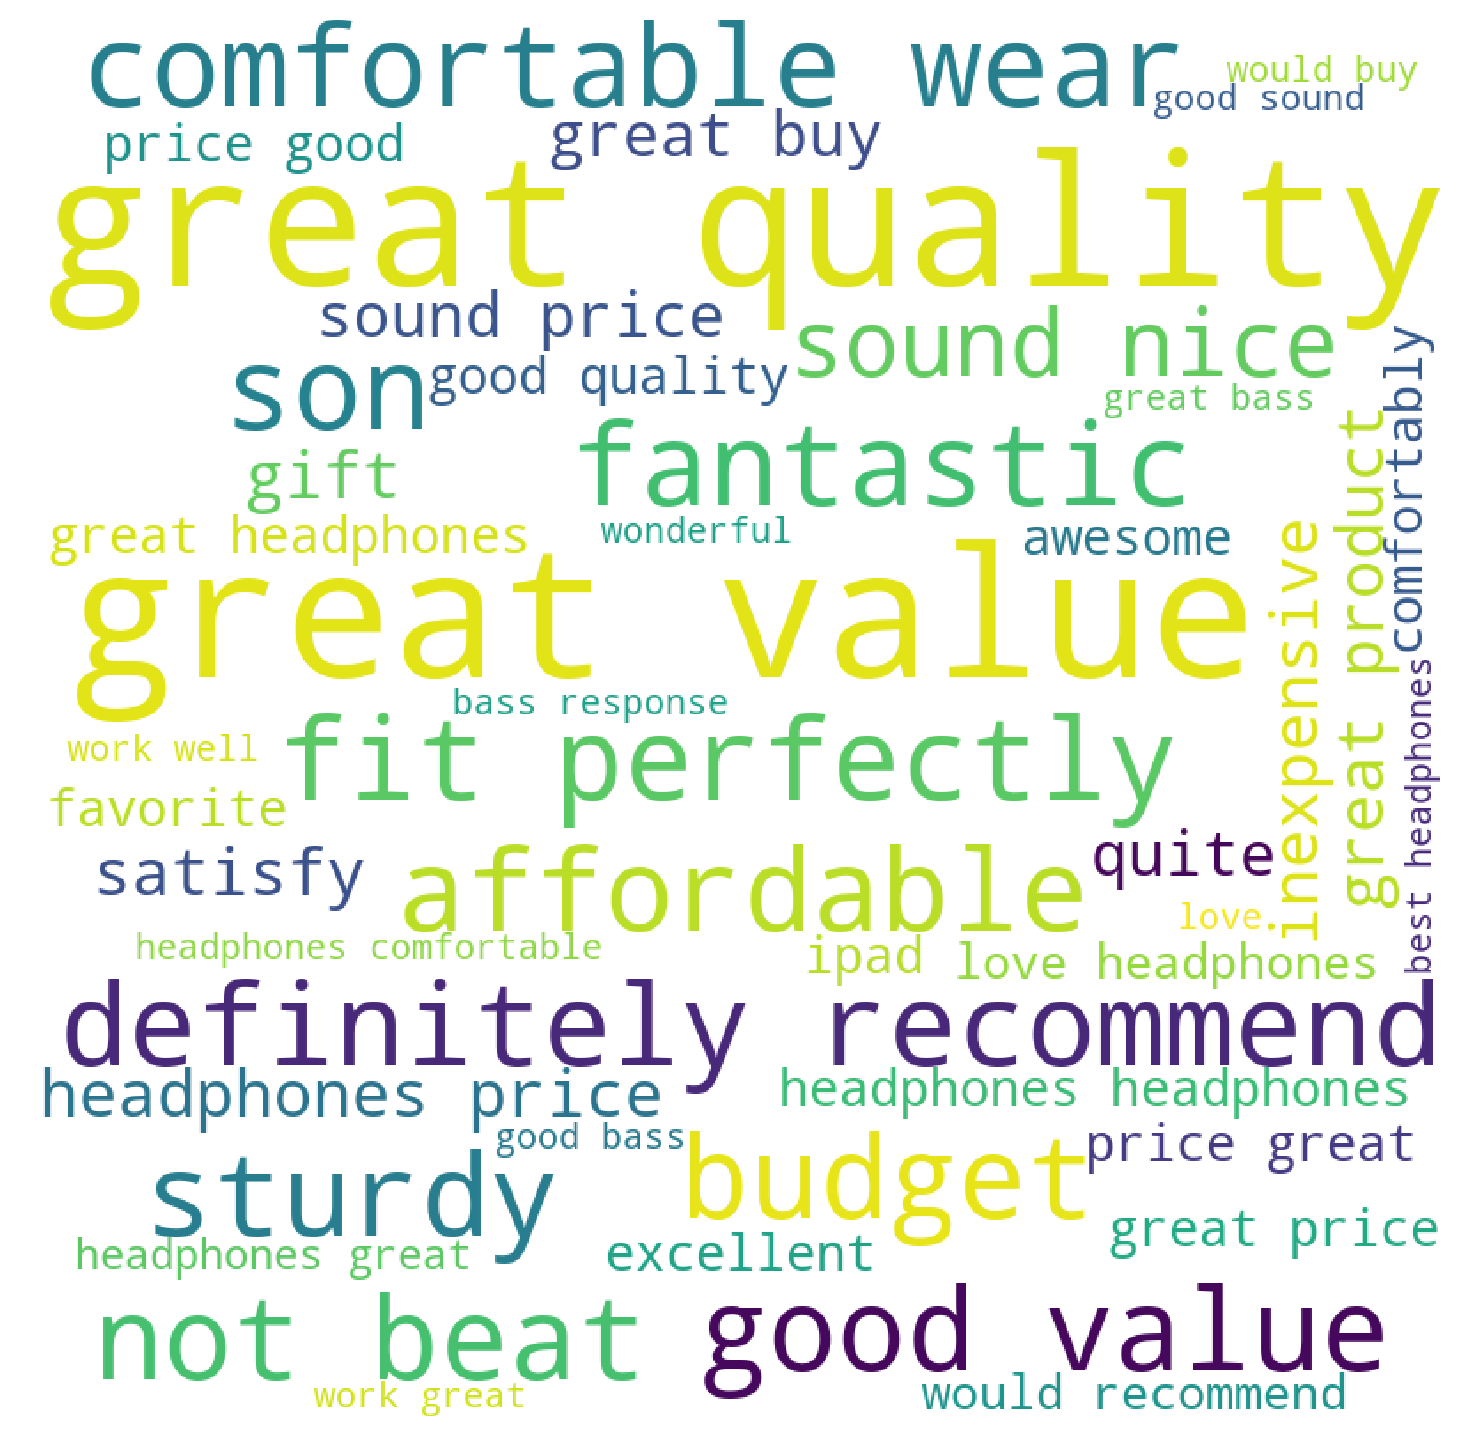

In [265]:

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_good)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Fixing the rating count value is above 100, the most common 50 words which belong to good rating class are shown in the table above. Each of these words define which products what kind of good impression have on the customers. 

#### Bad rating words

In [319]:
# Words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.query("rating_count > 10").sort_values(by= 'avg_rating', ascending=True)[:12]

In [320]:
df_bad.sort_values(by=['avg_rating'],ascending=False,inplace=True)
df_bad

feature_name  avg_rating  rating_count
42297       terrible    0.321429            28
36121         return    0.316667            60
46126          waste    0.300000            20
35589         refund    0.285714            14
29029  not recommend    0.280000            25
41058      stop work    0.266667            30
32516           poor    0.243243            37
29164      not worth    0.238095            21
46130    waste money    0.230769            13
9191            crap    0.230769            13
22033           junk    0.142857            14
20347       horrible    0.000000            19

In [321]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['avg_rating'].tolist()))

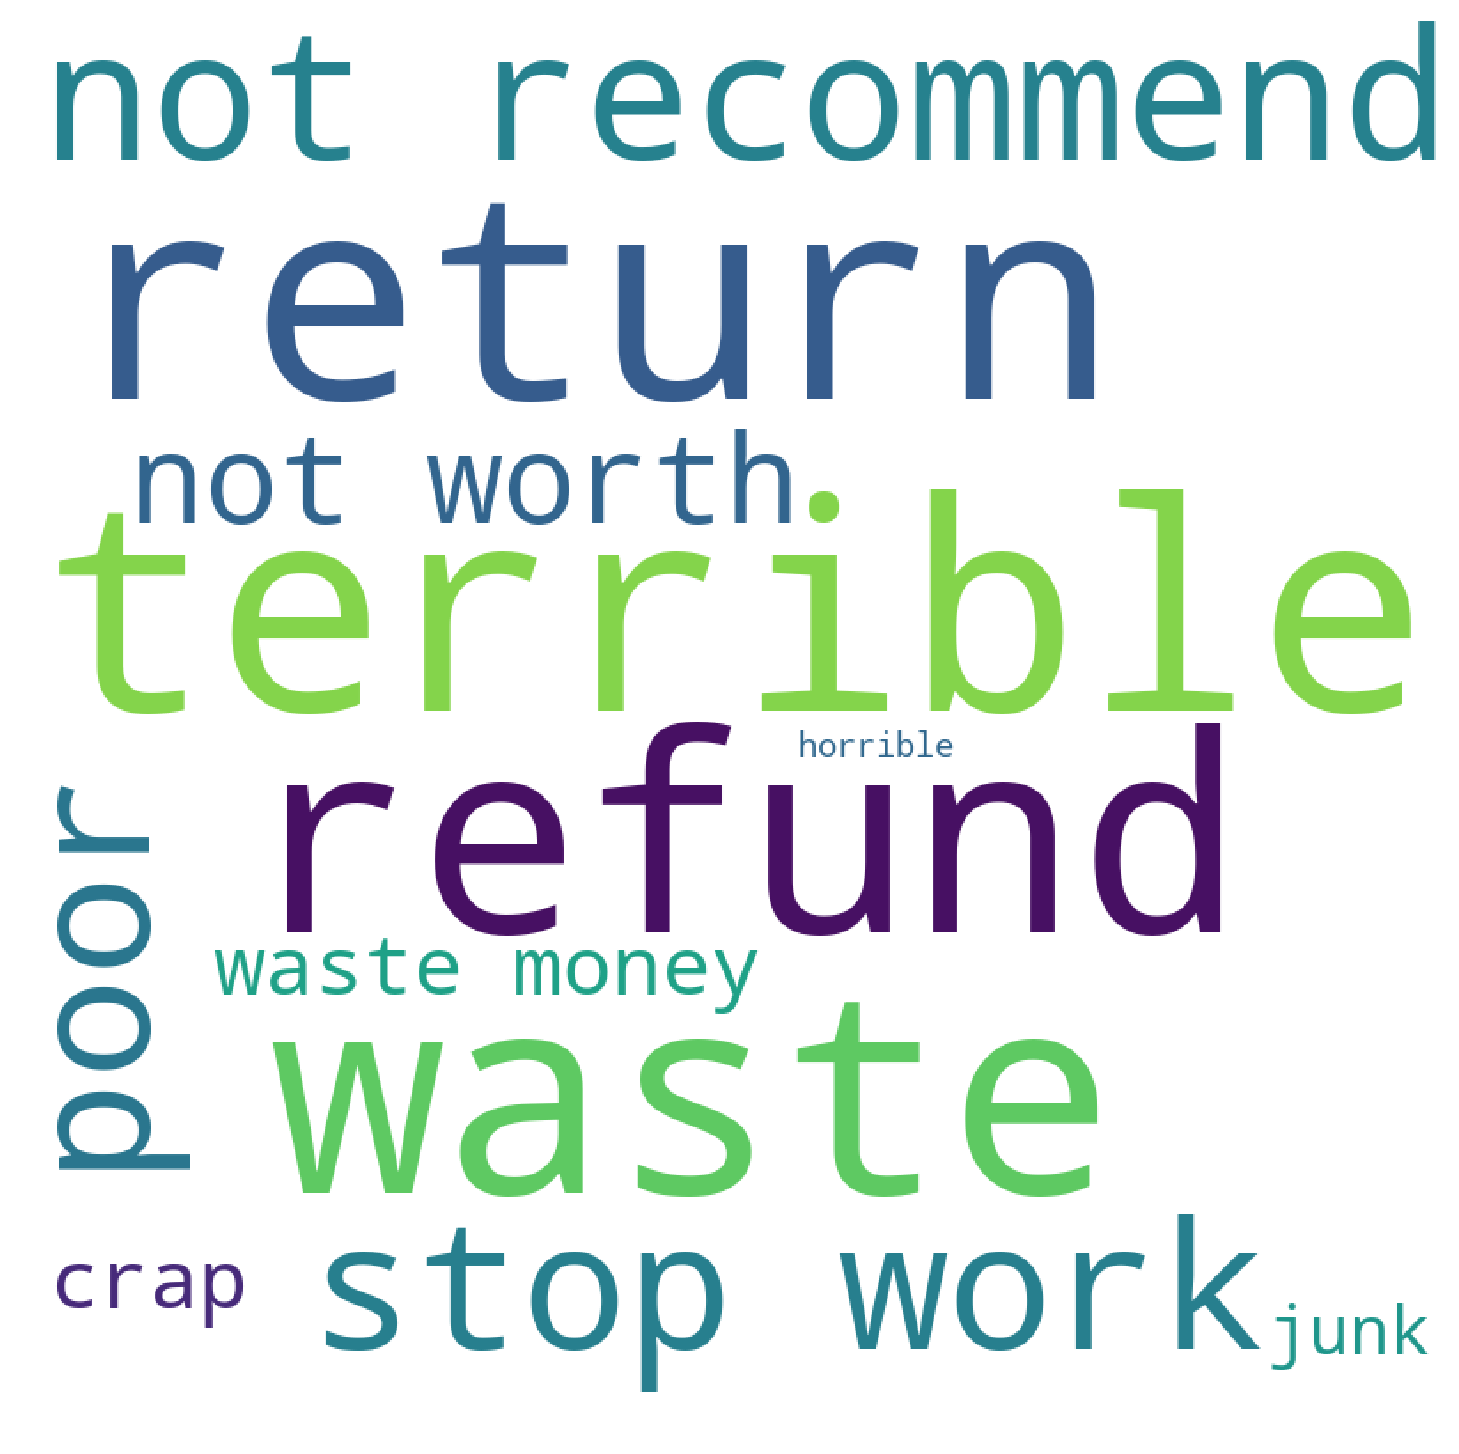

In [329]:
# Generate a word cloud image

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(wc_bad)
 
# plot the WordCloud image                       
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1001391 to 999663
Data columns (total 23 columns):
product_id           61129 non-null object
rating               61129 non-null int64
reviewer_id          61129 non-null object
reviewer_name        61129 non-null object
unix_review_time     61129 non-null datetime64[ns]
url                  61129 non-null object
description          61129 non-null object
categories           61129 non-null object
product_title        61129 non-null object
price                61129 non-null float64
related              61129 non-null object
brand_name           61129 non-null object
review_text          61129 non-null object
pos_feedback         61129 non-null int64
neg_feedback         61129 non-null int64
rating_class         61129 non-null object
help_prop            61129 non-null float64
clean_text           61129 non-null object
year                 61129 non-null int64
rating_class_num     61129 non-null int64
token              

In [64]:
df4.to_csv('/users/hp/desktop/Ds-springboard/capstone_2/data/Reduced_Cleaned_Reviews_electronics_headphones.csv', sep=',', encoding='utf-8', index = False)

